# Tutorial_6.1 Thinking with Deep Learning: Week 6 Part 1
# Deep Learning with Graphs, Networks, and Manifolds

__Instructor:__ James Evans

__Notebook Author:__ Bhargav Srinivasa Desikan

__Teaching Assistants & Course Organizers:__ Likun Cao & Partha Kadambi 

In this notebook we will be exploring the world of deep learning for graphs, and all its contours. 

You will notice some code from previous tutorials featuring graphs and networks, such as setting up a basic network and creating node2vec embeddings. We build on these methods in this notebook.


# Network Data

This section walks us through dealing with different kinds of network data and how to create representations of them which we can later use for ML and DL algorithms. We will also walk through some basic analyses we can do on networks and network-derived statistics we can pass to different models. 

**IMPORTANT**

Here are some resources for graph and network data:
- Open Graph Benchmark - https://github.com/snap-stanford/ogb
- SNAP - http://snap.stanford.edu/data/index.html

You can also find many social networks and graph datasets on popular graph based packages such as karateclub, StellarGraph, and PyTorch_geometric.

In [106]:
import numpy as np
import networkx as nx

We mentioned that graphs are a way to represent connections between entities. From a mathematical perspective, this can be a set, one with information of the entities and the other with information on the edges (connections). It can also be a matrix or table, where each node is both a row and column, and a cell at the intersection of row and column indicates a connection between the two entities. Both of these naturally translate into a computational perspective. Let's try it out.

In [107]:
G = nx.Graph()

So now we have an empty graph object. In networkx we can add nodes and edges easily, and also convert this into a numpy matrix representation.

In [108]:
# adding one at a time
G.add_node(1)

In [109]:
# adding a list 
G.add_nodes_from([2, 4])

In [110]:
G.nodes()

NodeView((1, 2, 4))

In [111]:
# we can add edges / connection
G.add_edge(1, 2)

In [112]:
# list of edges
G.add_edges_from([(1, 4), (2, 4)])

In [113]:
G.edges()

EdgeView([(1, 2), (1, 4), (2, 4)])

In [114]:
G[1][2]['weight'] = 2

In [115]:
nx.to_numpy_matrix(G)

matrix([[0., 2., 1.],
        [2., 0., 1.],
        [1., 1., 0.]])

So we see how each of the nodes here are one per row and column, and the values in the matrix represent the weights. Networkx also lets us draw the matrix.

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt

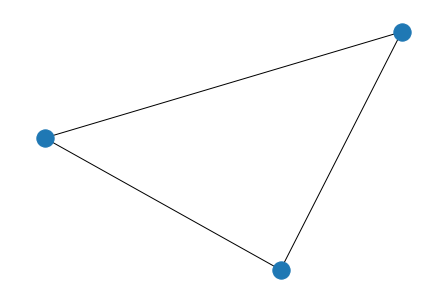

In [117]:
nx.draw(G)

Networkx also lets you convert graphs to and from pandas, numpy, lists, dictionaries.. and so on. We highly recommend you check out for a full list of the functions which help you do this converting: https://networkx.org/documentation/stable//reference/convert.html

This means we can manipulate graphs in many ways and in different data formats. 
Another way to play with graphs is generate graphs from random processes, or load graphs previously created by others. Let's check both out!

In [118]:
random_graph = nx.fast_gnp_random_graph(n=15, p=0.5)

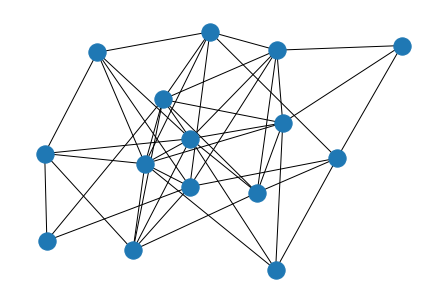

In [119]:
nx.draw(random_graph)

There are also popular, small networks created through different methods of data collection - in this case, an anthropological study. 

Zachary W. (1977). "An information flow model for conflict and fission in small groups". Journal of Anthropological Research, 33, 452-473.

In [120]:
karate_club_graph = nx.karate_club_graph()

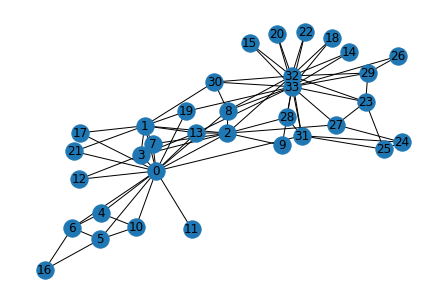

In [121]:
nx.draw(karate_club_graph, with_labels=True)

In [122]:
nx.to_numpy_matrix(karate_club_graph)

matrix([[0., 1., 1., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 1.],
        [0., 0., 1., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.]])

Common network-related tasks include link prediction, node classification, and the simulation of diffusions (e.g., of a disease or cultural norm) across the network. For these kinds of tasks, certain network features are useful. Networkx has a full suite of network related algorithms: https://networkx.org/documentation/stable/reference/algorithms/index.html

Let's see one such example with degree centrality--a measure of how central different nodes are as a function of the number of edges associated with it.

In [123]:
nx.degree_centrality(karate_club_graph)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

Network science is a vast field deeply linked (pun intended) with data science. While we'll look at deep learning for graphs and tables in more detail on the dedicated chapter to it, let's whip up a few basic graph-based embeddings to see what they reveal!



## Generating Random Graphs

We briefly saw this in the above section with the karate club when we created a small random graph.

[Random graphs](https://en.wikipedia.org/wiki/Random_graph) are graphs generated over a random process - it is possible to control different characteristics of a graph, such as the nodes, edges, and communities in the graph/network. While we won't dive deep into such processes as they are beyond the scope of this notebook, being aware of such random graphs and being able to use them is an important skill.

Networkx offers many ways to generate graphs.
- [networkx](https://networkx.org/documentation/stable/reference/generators.html)
- [pyrgg](https://pypi.org/project/pyrgg/) 

In [124]:
random_newman_real_world_graph = nx.newman_watts_strogatz_graph(100, 20, 0.05)

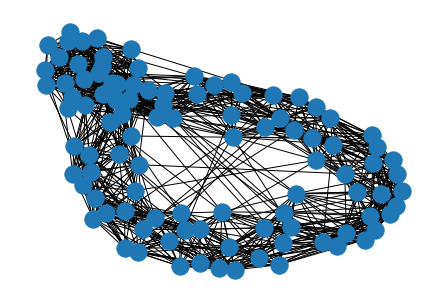

In [125]:
nx.draw(random_newman_real_world_graph)

## Sampling from Graphs

Sampling sub-graphs from very large graphs is another important problem in this domain. 

[little ball of fur](https://github.com/benedekrozemberczki/littleballoffur) is a python package which is specialised in sampling procedures on graphs and networks.

In [ ]:
!pip install littleballoffur

In [ ]:
from littleballoffur import DiffusionSampler

In [ ]:
sampler = DiffusionSampler()

In [ ]:

new_graph = sampler.sample(random_newman_real_world_graph)

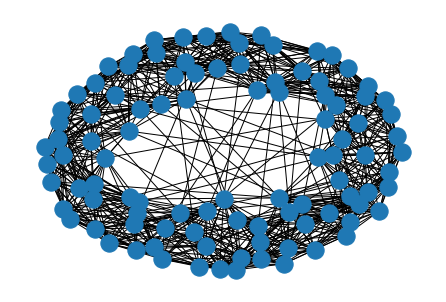

In [ ]:
nx.draw(new_graph)

Now that we've seen some basic graph functions, we can jump into using neural and related methods on graphs.

## Community Detection with networkx

Finding clusters or communities in a network is one of the more popular tasks on graphs and networks. Networkx offers many inbuilt methods to identify such communities in their [community class](https://networkx.org/documentation/stable/reference/algorithms/community.html).

Here, we see the Girvan Newman community detection method. From the networkx docs:

The Girvan–Newman algorithm detects communities by progressively removing edges from the original graph. The algorithm removes the “most valuable” edge, traditionally the edge with the highest betweenness centrality, at each step. As the graph breaks down into pieces, the tightly knit community structure is exposed and the result can be depicted as a dendrogram.



In [126]:
from networkx.algorithms import community

In [127]:
communities_generator = community.girvan_newman(karate_club_graph)

In [128]:
node_groups = tuple(sorted(c) for c in next(communities_generator))

In [129]:
node_groups

([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [160]:
# plot the communities
color_map = []
for node in karate_club_graph:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

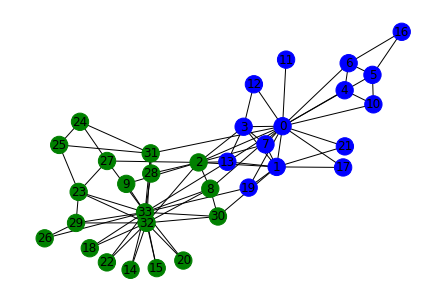

In [161]:
nx.draw(karate_club_graph, node_color=color_map, with_labels=True)

We can see that the girvan newman method does a good job with the karate club network!

# Graph Based Shallow Embeddings


## node2vec

[node2vec](https://arxiv.org/abs/1607.00653) (Grover and Lescovec, 2016) is one such popular embedding. Intuition: Find embedding of nodes to dimensions so that “similar” nodes in the graph are close together.

In [171]:
!pip install node2vec

In [172]:
from node2vec import Node2Vec

In [173]:
node2vec = Node2Vec(karate_club_graph, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

In [176]:
model = node2vec.fit(window=10, min_count=1, batch_words=4)

In [35]:
model.wv.get_vector('0')

array([ 0.2812799 , -0.08471076, -0.19058003,  0.13148193, -0.0334448 ,
       -0.18158884,  0.06951568, -0.15324365,  0.10110573,  0.13912277,
        0.16834058,  0.25695953,  0.13117221,  0.10952862, -0.14412445,
       -0.183745  ,  0.06866466,  0.00759569,  0.27279273,  0.2109076 ,
       -0.04547181, -0.06703079, -0.10422332, -0.02271719, -0.12549533,
        0.08614285, -0.14328523, -0.11605126, -0.33709794, -0.18467644,
       -0.25088271,  0.11454343,  0.1570853 , -0.04627213,  0.10439391,
        0.0294947 , -0.06756457, -0.02579457, -0.01773476, -0.02370049,
        0.02935283,  0.04002379, -0.15439351,  0.00168985,  0.07659639,
        0.19472663,  0.04874708,  0.27379477,  0.00427627, -0.07520682,
        0.22597894,  0.13975523, -0.00443268,  0.02212266,  0.01799364,
        0.00982056, -0.16949205, -0.07805494,  0.0610997 ,  0.01947131,
        0.11517981,  0.16109738, -0.03132284, -0.2001208 ], dtype=float32)

In [36]:
model.wv.most_similar('0')

[('4', 0.7953581809997559),
 ('10', 0.7886849641799927),
 ('11', 0.760037899017334),
 ('5', 0.7415027022361755),
 ('6', 0.7411495447158813),
 ('7', 0.711673378944397),
 ('16', 0.7100372910499573),
 ('12', 0.6868771314620972),
 ('1', 0.6845428943634033),
 ('21', 0.6810906529426575)]

In [37]:
model.wv.most_similar('33')

[('15', 0.8385347723960876),
 ('32', 0.8247308731079102),
 ('22', 0.806733250617981),
 ('29', 0.7778297662734985),
 ('20', 0.7764429450035095),
 ('18', 0.7563306093215942),
 ('14', 0.7317380309104919),
 ('23', 0.6780580282211304),
 ('8', 0.6671505570411682),
 ('26', 0.6570064425468445)]

Take some time to interpret the closest nodes based on the node2vec embedding  - what aspect of similarity is best captured? 

The node2vec package also includes edge embeddings, via the Hadamard (the best performing approach).

In [38]:
from node2vec.edges import HadamardEmbedder

In [39]:
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

In [40]:
edges_embs[('24', '25')]

array([ 6.76014693e-04,  5.21392971e-02,  1.04860105e-01,  1.22753330e-01,
        3.33655588e-02,  3.49961920e-03,  2.48527918e-02,  9.33413059e-02,
        2.50128005e-03,  2.16238853e-02,  1.04294177e-02,  1.83368083e-02,
        1.78509410e-02,  4.06690780e-03,  1.49111282e-02,  2.01039873e-02,
        2.19188649e-02, -7.44950026e-04,  6.81673586e-02,  2.40758564e-02,
        3.42449248e-02,  1.88382015e-01,  3.63493636e-02,  7.97793940e-02,
        1.80806068e-03,  1.29105127e-03,  1.29363183e-02,  5.08351484e-04,
        8.06882605e-03,  1.20537132e-02,  2.46182550e-03,  1.52896978e-02,
        6.47169305e-03,  4.28832881e-02,  1.82129126e-02,  2.00926419e-02,
        2.58607753e-02,  7.74916932e-02, -6.82971615e-04,  3.67152650e-04,
       -2.96753598e-03,  6.88174292e-02,  4.09686118e-02,  6.59271283e-03,
        1.73671031e-03,  7.62681365e-02,  7.97338113e-02,  2.97138444e-03,
        1.21736871e-02,  5.79287810e-03,  3.87962535e-02,  4.42476608e-02,
       -7.37572368e-03,  

In [41]:
edges_kv = edges_embs.as_keyed_vectors()

Generating edge features: 100%|██████████| 595/595.0 [00:00<00:00, 64883.42it/s]


In [42]:
edges_kv.most_similar(str(('24', '25')))

[("('24', '24')", 0.9447174072265625),
 ("('24', '27')", 0.9438173770904541),
 ("('25', '25')", 0.9370794296264648),
 ("('23', '25')", 0.9001096487045288),
 ("('25', '27')", 0.8805886507034302),
 ("('23', '24')", 0.8766524791717529),
 ("('25', '28')", 0.8662056922912598),
 ("('24', '31')", 0.8566427826881409),
 ("('24', '28')", 0.8478516340255737),
 ("('23', '27')", 0.8401809334754944)]

These node and edge embeddings can be used for a wide range of other downstream tasks. node2vec serves as a useful way to quickly prototype these alternate approaches to representing a network or graph. It's also possible to embed an entire graph, and then we can measure between two different graphs. Graph Neural Network models also help you perform a series of tasks on graphs such as community detection and link prediction. We'll be seeing this in more detail in later chapters, but hopefully this gave you an idea of the different graph representations out there!

## DeepWalk

Deepwalk is another popular shallow embedding method which uses random walks on a graph combined with word2vec to create embeddings. It was first described in [DeepWalk: Online Learning of Social Representations](https://arxiv.org/pdf/1403.6652.pdf). The GitHub repository with the code is: https://github.com/phanein/deepwalk, where you can run the code via command line.

In the cells below, we adapt the code from this GitHub repository (https://github.com/prateekjoshi565/DeepWalk) which creates it from scratch. You can also download the data in the repository, which is Wikipedia data.

In [43]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

You can get the dataset from https://densitydesign.github.io/strumentalia-seealsology/

__Steps to download:__

a) Enter the following links:

https://en.wikipedia.org/wiki/Space_research

https://en.wikipedia.org/wiki/Space_Race

https://en.wikipedia.org/wiki/Space_exploration

b) Download the TSV file.

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
df = pd.read_csv("/content/drive/MyDrive/deep-learning/seealsology-data.tsv", sep = "\t")

In [46]:
df.head()

,source,target,depth
0,space research,advances in space research,1
1,space research,benefits of space exploration,1
2,space research,committee on space research,1
3,space research,deep space exploration,1
4,space research,lists of space programs,1


In [49]:
df.shape

(717, 3)

In [50]:
# construct an undirected graph
G=nx.from_pandas_edgelist(df, "source", "target", edge_attr=True, create_using=nx.Graph())

In [51]:
terms = ['lunar escape systems','soviet moonshot', 'soyuz 7k-l1', 'moon landing',
         'space food', 'food systems on space exploration missions', 'meal, ready-to-eat',
         'space law', 'metalaw', 'moon treaty', 'legal aspects of computing',
         'astronaut training', 'reduced-gravity aircraft', 'space adaptation syndrome', 'micro-g environment']

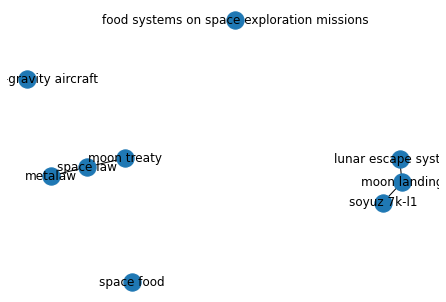

In [52]:
nx.draw(G.subgraph(terms), with_labels = True)

In [53]:
len(G) # number of nodes

518

In [54]:
# function to generate random walk sequences of nodes
def get_randomwalk(node, path_length):
    
    random_walk = [node]
    
    for i in range(path_length-1):
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk

In [56]:
get_randomwalk('space exploration', 10)

['space exploration',
 'discovery and exploration of the solar system',
 'timeline of planetary exploration',
 'new frontiers program',
 'timeline of solar system exploration',
 'out of the cradle (book)']

In [57]:
all_nodes = list(G.nodes())

random_walks = []

for n in tqdm(all_nodes):
    for i in range(5):
        random_walks.append(get_randomwalk(n,10))

100%|██████████| 518/518 [00:00<00:00, 12953.41it/s]


In [58]:
# count of sequences
len(random_walks)

2590

In [60]:
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

In [61]:
# train word2vec model
model = Word2Vec(window = 4, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(random_walks, progress_per=2)

In [62]:
model.train(random_walks, total_examples = model.corpus_count, epochs=20, report_delay=1)

(169325, 223520)

In [63]:
print(model)

Word2Vec(vocab=518, size=100, alpha=0.03)


In [67]:
random_walks[30]

['outer space',
 'animals in space',
 'monkeys in space',
 'space exploration',
 'newspace',
 'space colonization',
 'mars to stay']

In [68]:
# find top n similar nodes
model.wv.most_similar('monkeys in space')

[('ham (chimpanzee)', 0.9812915921211243),
 ('space chimps', 0.9789363145828247),
 ('soviet space dogs', 0.9772225618362427),
 ('one small step: the story of the space chimps', 0.9714019298553467),
 ('captain simian & the space monkeys', 0.9612415432929993),
 ('laika', 0.954409122467041),
 ('alice king chatham', 0.9393492937088013),
 ('space dogs', 0.9377307295799255),
 ('sputnik program', 0.9371158480644226),
 ('monkeys and non-human apes in space', 0.9265921711921692)]

In [76]:
terms = ['lunar escape systems','soviet moonshot', 'soyuz 7k-l1', 'moon landing',
         'space food', 'food systems on space exploration missions', 'meal, ready-to-eat',
         'space law', 'metalaw', 'moon treaty', 'legal aspects of computing',
         'astronaut training', 'reduced-gravity aircraft', 'space adaptation syndrome', 'micro-g environment']

random.seed(1)
terms = set()

while len(terms) < 20:
    walk = random.choice(random_walks)
    terms.add(random.choice(walk))

In [78]:
def plot_nodes(word_list):
    X = [model.wv[x] for x in word_list]
    
    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    
    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
        
    plt.show()

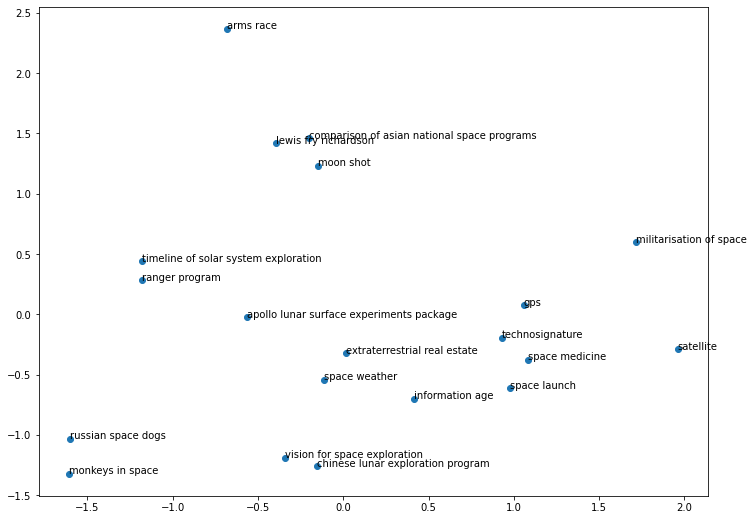

In [79]:
plot_nodes(terms)

What you saw was a step by step way of implementing DeepWalk - we will soon see how we can implement it even easier using special packages.

# Graph Based Machine Learning

Traditional Machine Learning for graphs and networks usually feature the following tasks

- **node classification**
- **edge classification**
- **link prediction**
- **community detection**
- **diffusion (gossip, information, culture, disease)**
- **evolution and mutation of networks** 

Today (as we will see below), neural network inspired deep and shallow networks are the most popular methods for graph-based tasks.

We recommend the following packages for Machine Learning for Graphs and Networks

- karateclub - https://karateclub.readthedocs.io/en/latest/
- StellarGraph - https://stellargraph.readthedocs.io/en/stable/

StellarGraph focuses on deep learning based algorithms, while karateclub is more suited to creating embeddings that can be used in machine learning pipelines. 

In this section, we walk through some simple examples of community detection and machine learning on graph embeddings.

We will be using the text and code from the [introduction page](https://karateclub.readthedocs.io/en/latest/notes/introduction.html) of the KarateClub package.

In [222]:
!pip install karateclub

#restart the kernel after installing this package

     |████████████████████████████████| 62 kB 626 kB/s 
     |████████████████████████████████| 1.8 MB 8.0 MB/s 
     |████████████████████████████████| 24.1 MB 1.1 MB/s 
     |████████████████████████████████| 50 kB 7.7 MB/s 
  Created wheel for karateclub: filename=karateclub-1.2.3-py3-none-any.whl size=97754 sha256=6b182cb538430b3d3cae9c2b6432a6f386bde5affca62573bb6f9ad29aa29c5a
  Stored in directory: /root/.cache/pip/wheels/7a/09/80/0d50455fd4e297e88f8f38a711c6f4849e6bd1a330000dde3d
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149869 sha256=aa326438471807962f70f629f1bf59b9094e4d7a673aabf62b0d2e4467c76233
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built karateclub python-Levenshtein
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [223]:
! pip install scikit-plot

Karate Club uses the design principles of Scikit-Learn, which means that algorithms in the package share the same API. Each machine learning model is implemented as a class that inherits from Estimator. Constructors of the models are used to set the hyperparameters. The models have default hyperparameters that work well out of the box. This means that non expert users do not have to make decisions about these in advance and only a little fine tuning is required. For each class the fit method provided learns the embedding or clustering of nodes/graphs in the NetworkX graph. This method takes the data used for learn the embedding or clustering. Models provide the additional public methods get_embedding, get_memberships, get_cluster_centers. This API driven design means that one can create a DeepWalk embedding of a Watts-Strogatz graph just like this.

In [ ]:
import networkx as nx
from karateclub import DeepWalk

g = nx.newman_watts_strogatz_graph(100, 20, 0.05)

model = DeepWalk()
model.fit(g)
embedding = model.get_embedding()

This can be modified to create a Walklets embedding with minimal effort like this. Walklets learn multiscale representations of vertices in a network by subsampling short random walks on the vertices of a graph. By `skipping' over steps in each random walk, the method generates a corpus of vertex pairs reachable via paths of a fixed length. This corpus can then be used to learn a series of latent representations, each of which captures successively higher order relationships from the adjacency matrix. Because Walklets is an online algorithm, it easily scales to graphs with millions of vertices and edges.

In [225]:
from karateclub.node_embedding.neighbourhood import Walklets

In [ ]:
model = Walklets()
model.fit(g)
embedding = model.get_embedding()

Looking at these two snippets the advantage of the API-driven design is evident. First, one had to change the import of the model. Second, we needed to change the model construction and the default hyperparameters were already set. The public methods provided by DeepWalk and Walklets are the same. An embedding is learned with fit and returned by get_embedding. This allows for quick, minimal changes to the code when a model performs poorly.

### Community detection

The first machine learning task we will do is the clustering of pages on Facebook. In this network, nodes represent official verified Facebook pages and links between them are mutual likes. The pages have categories and we will look how well the cluster and group memberships are aligned. For details about the dataset see this paper.

We first need to load the Facebook page-page network dataset. We will use the page-page graph and the page category vector. These are returned as a NetworkX graph and numpy array respectively.

In [233]:
from karateclub import GraphReader

In [234]:

reader = GraphReader("facebook")

graph = reader.get_graph()
target = reader.get_target()

The constructor defines the graph reader object while the methods get_graph and get_target read the data.

Now let’s use the Label Propagation community detection method from [Near Linear Time Algorithm to Detect Community Structures in Large-Scale Networks](https://arxiv.org/abs/0709.2938).



In [238]:
from karateclub import LabelPropagation

model = LabelPropagation()
model.fit(graph)
cluster_membership = model.get_memberships()

The constructor defines a model, we fit the model on the Facebook graph with the fit method and return the cluster memberships with the get_memberships method as a dictionary.

Finally we can evaluate the clustering using normalized mutual information. First we need to create an ordered list of the node memberships. We use the ground truth about the cluster memberships for calculating the normalized mutual info score (NMI).

In [239]:
from sklearn.metrics.cluster import normalized_mutual_info_score

cluster_membership = [cluster_membership[node] for node in range(len(cluster_membership))]

nmi = normalized_mutual_info_score(target, cluster_membership)


In [240]:
print('NMI: {:.4f}'.format(nmi))

NMI: 0.2738


It is worth noting that the clustering methods in Karate Club work on arbitrary NetworkX graphs that follow the dataset formatting requirements. One could simply cluster a randomly generated Watts-Strogatz graph just like this.

In [ ]:
from karateclub import LabelPropagation


In [ ]:
graph = nx.newman_watts_strogatz_graph(100, 20, 0.05)

In [ ]:
model = LabelPropagation()
model.fit(graph)
cluster_membership = model.get_memberships()

### Node embedding for Machine Learning

The second machine learning task we consider is the identification of users from the UK who abuse the Twitch platform. In the social network of interest nodes represent users and the links are mutual friendships between them. Our goal is to perform binary classification of users (platform abusers and general 'good guy' users). For details about the dataset see this paper.

We first need to load the Twitch UK dataset. We will use the user friendship graph and the abusive user target vector. These are returned as a NetworkX graph and numpy array respectively.

In [261]:
reader = GraphReader("twitch")

graph = reader.get_graph()
y = reader.get_target()

We fit a Diff2vec node embedding ([Fast Sequence-Based Embedding with Diffusion Graphs](https://arxiv.org/abs/2001.07463)), with a low number of dimensions, diffusions per source node, and short Euler walks. First, we use the model constructor with custom parameters. Second, we fit the model to the graph. Third, we get the node embedding, which we receive as a numpy array.


In [ ]:
from karateclub import Diff2Vec

model = Diff2Vec(diffusion_number=2, diffusion_cover=20, dimensions=16)
model.fit(graph)
X = model.get_embedding()

We use the node embedding features as predictors of abusive behaviour. So let us create a train-test split of the explanatory and target variable with Scikit-Learn. We will use a test data ratio of 20%. Here it is:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using the training data (X_train and y_train) we learn a logistic regression model to predict the probability of someone being an abusive user. We perform inference on the test set for this target. Finally, we evaluate the model performance by printing an area under the ROC curve value.

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier

downstream_model = MLPClassifier(random_state=0).fit(X_train, y_train)
y_hat = downstream_model.predict_proba(X_test)
auc = roc_auc_score(y_test, downstream_model.predict(X_test))

In [ ]:
import scikitplot as skplt


In [ ]:
y_test

array([0, 0, 0, ..., 1, 1, 1])

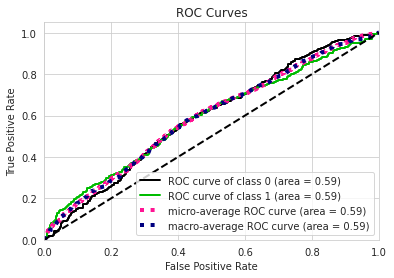

In [ ]:
skplt.metrics.plot_roc_curve(y_test, y_hat)
# plt.show() 

In [ ]:
print('AUC: {:.4f}'.format(auc))

AUC: 0.5677


### Graph embedding and Machine Learning

The third machine learning task that we look at is the classification of threads from the online forum Reddit. Threads can be of of two types - discussion and nondiscussion-based ones. Our goal is to predict the type of the thread based on the topological (structural) properties of the graphs. The specific dataset that we look a 10 thousand graph subsample of the Reddit 204K dataset that contains a large number of threads from spring 2018. The graphs in the dataset do not have a specific feature. Because of this we use the degree centrality as a string feature. For details about the dataset see this [**paper**](https://arxiv.org/abs/2003.04819).

We first need to load the Reddit 10K dataset. We will use the use the graphs and the discussion/non-discussion target vector. These are returned as a list of NetworkX graphs and numpy array respectively.

In [337]:
from karateclub.dataset import GraphSetReader

In [338]:
reader = GraphSetReader("reddit10k")

graphs = reader.get_graphs()
y = reader.get_target()

We fit a [FEATHER](https://arxiv.org/pdf/2005.07959.pdf) graph level embedding, with standard hyperparameter settings. These are widely used settings. First, we use the model constructor without custom parameters. Second, we fit the model to the graphs. Third, we get the graph embedding, which is a numpy array.

In [339]:
from karateclub import FeatherGraph

model = FeatherGraph()
model.fit(graphs)
X = model.get_embedding()

We use graph embedding features as predictors of the thread type. So let us create a train-test split of the explanatory variables and the target variable with Scikit-Learn. We will use a test data ratio of 20%. Here it is.



In [340]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Using the training data (X_train and y_train) we learn a logistic regression model to predict the probability of a thread being discussion based. We perform inference on the test set for this target. Finally, we evaluate model performance by printing an area under the ROC curve value.

In [341]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

downstream_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_hat = downstream_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_hat)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [342]:
print('AUC: {:.4f}'.format(auc))

AUC: 0.8171


### Note on StellarGraph and KarateClub

So far we've seen how different embeddings can perform classification tasks down the line, using karateclub and scikit-learn.

We will now try using StellarGraph, which offers a Keras like interface to training models. We will be continuing with our approach of using embeddings followed by a machine learning task. We will be following this [tutorial](https://stellargraph.readthedocs.io/en/stable/demos/link-prediction/ctdne-link-prediction.html) on the StellarGraph documentation page. 

## Link prediction with Continuous-Time Dynamic Network Embeddings (CTDNE)



Reference Paper: http://ryanrossi.com/pubs/nguyen-et-al-WWW18-BigNet.pdf

This is a demo of StellarGraph's implementation of Continuous-Time Dynamic Network Embeddings. The steps outlined in this notebook show how time respecting random walks can be obtained from a graph containing time information on edges, and how these walks can be used to generate network embeddings for a link prediction task.

We compare the embeddings learnt from temporal walks with non-temporal walks in this demo.

In [343]:
# install StellarGraph if running on Google Colab
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.2.1

     |████████████████████████████████| 435 kB 4.3 MB/s 
     |████████████████████████████████| 482 kB 39.2 MB/s 
     |████████████████████████████████| 462 kB 47.3 MB/s 
     |████████████████████████████████| 41 kB 483 kB/s 


In [344]:
# verify that we're using the correct version of StellarGraph for this notebook
import stellargraph as sg

try:
    sg.utils.validate_notebook_version("1.2.1")
except AttributeError:
    raise ValueError(
        f"This notebook requires StellarGraph version 1.2.1, but a different version {sg.__version__} is installed.  Please see <https://github.com/stellargraph/stellargraph/issues/1172>."
    ) from None

In [345]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from stellargraph import StellarGraph
from stellargraph.datasets import IAEnronEmployees

%matplotlib inline

### Dataset

The dataset used in this demo is called `enron-ia-employees`, available in Network Repository: http://networkrepository.com/ia-enron-employees.php

(See [the "Loading from Pandas" demo](../basics/loading-pandas.ipynb) for details on how data can be loaded.)

In [346]:
dataset = IAEnronEmployees()
display(HTML(dataset.description))

full_graph, edges = dataset.load()

### Split edges

We want to split the edges into parts that can be used for our link prediction task:
* the oldest edges are used to create the graph structure
* the recent edges are what we are interested in predicting - we randomly split this part further into training and test sets.

In [347]:
# subset of edges to split
train_subset = 0.25
test_subset = 0.25

# number of edges to be kept in the graph
num_edges_graph = int(len(edges) * (1 - train_subset))

# keep older edges in graph, and predict more recent edges
edges_graph = edges[:num_edges_graph]
edges_other = edges[num_edges_graph:]

# split recent edges further to train and test sets
edges_train, edges_test = train_test_split(edges_other, test_size=test_subset)

print(
    f"Number of edges in graph: {len(edges_graph)}\n"
    f"Number of edges in training set: {len(edges_train)}\n"
    f"Number of edges in test set: {len(edges_test)}"
)

Number of edges in graph: 37929
Number of edges in training set: 9482
Number of edges in test set: 3161


### Create a StellarGraph

Now we can use the edges we've reserved for the graph to create an instance of the StellarGraph class

In [348]:
graph = StellarGraph(
    nodes=pd.DataFrame(index=full_graph.nodes()),
    edges=edges_graph,
    edge_weight_column="time",
)

### Create link examples for training and testing

The edges that we've reserved for the train/test sets become examples of positive links. 

We also need to randomly generate some examples of negative links in order to train our classifier.

In [349]:
def positive_and_negative_links(g, edges):
    pos = list(edges[["source", "target"]].itertuples(index=False))
    neg = sample_negative_examples(g, pos)
    return pos, neg


def sample_negative_examples(g, positive_examples):
    positive_set = set(positive_examples)

    def valid_neg_edge(src, tgt):
        return (
            # no self-loops
            src != tgt
            and
            # neither direction of the edge should be a positive one
            (src, tgt) not in positive_set
            and (tgt, src) not in positive_set
        )

    possible_neg_edges = [
        (src, tgt) for src in g.nodes() for tgt in g.nodes() if valid_neg_edge(src, tgt)
    ]
    return random.sample(possible_neg_edges, k=len(positive_examples))


pos, neg = positive_and_negative_links(graph, edges_train)
pos_test, neg_test = positive_and_negative_links(graph, edges_test)

It's good to verify that the data structures we've created so far from the raw data look reasonable.

`StellarGraph.info` is a useful method for inspecting the graph we've created, and we can also check that the number of link examples correspond to the train/test subset values we defined earlier.

And we can also check that the number of link examples correspond to the train/test subset values we defined earlier.

In [350]:
print(
    f"{graph.info()}\n"
    f"Training examples: {len(pos)} positive links, {len(neg)} negative links\n"
    f"Test examples: {len(pos_test)} positive links, {len(neg_test)} negative links"
)

StellarGraph: Undirected multigraph
 Nodes: 151, Edges: 37929

 Node types:
  default: [151]
    Features: none
    Edge types: default-default->default

 Edge types:
    default-default->default: [37929]
        Weights: range=[9.2639e+08, 1.00583e+09], mean=9.87855e+08, std=1.664e+07
        Features: none
Training examples: 9482 positive links, 9482 negative links
Test examples: 3161 positive links, 3161 negative links


### Running random walks

Define the random walk parameters we'd like to use:
* `num_walks_per_node` - Number of random walks to perform per starting node.
* `walk_length` - Length of each random walk. For temporal walks, this is the *maximum* length of a walk, since walks may end up being shorter when there are not enough time respecting edges to traverse.
* `context_window_size` - Size of the context window used to train the Word2Vec model.

In [351]:
num_walks_per_node = 10
walk_length = 80
context_window_size = 10

We try to keep the setup comparable between the use of temporal and biased (static) random walks. For temporal walks, the input parameter is defined in terms of the total number of context windows you are interested in obtaining, which differs from the traditional approach of specifying the number of walks to run per node in the graph. We calculate the number of context windows we need in terms of the traditional parameters as:

In [352]:
num_cw = len(graph.nodes()) * num_walks_per_node * (walk_length - context_window_size + 1)

We're now ready to do the walks

In [353]:
from stellargraph.data import TemporalRandomWalk

temporal_rw = TemporalRandomWalk(graph)
temporal_walks = temporal_rw.run(
    num_cw=num_cw,
    cw_size=context_window_size,
    max_walk_length=walk_length,
    walk_bias="exponential",
)

print("Number of temporal random walks: {}".format(len(temporal_walks)))

Number of temporal random walks: 1772


In [354]:
from stellargraph.data import BiasedRandomWalk

static_rw = BiasedRandomWalk(graph)
static_walks = static_rw.run(
    nodes=graph.nodes(), n=num_walks_per_node, length=walk_length
)

print("Number of static random walks: {}".format(len(static_walks)))

Number of static random walks: 1510


Using the random walks obtained, we can train our Word2Vec models to generate node embeddings

In [358]:
from gensim.models import Word2Vec

embedding_size = 128
temporal_model = Word2Vec(
    temporal_walks,
    size=embedding_size,
    window=context_window_size,
    min_count=0,
    sg=1,
    workers=2,
)
static_model = Word2Vec(
    static_walks,
    size=embedding_size,
    window=context_window_size,
    min_count=0,
    sg=1,
    workers=2,
)

For convenience, we can use the trained Word2Vec models to define helper functions that transform a node ID into a node embedding.

NOTE: Temporal walks may not generate an embedding for every node in the graph; if there's no temporal walks that involve a particular node or they are all too short, the node won't appear in any context window. We handle this by using zeros as embeddings for such nodes to indicate that they are uninformative.

In [359]:
unseen_node_embedding = np.zeros(embedding_size)


def temporal_embedding(u):
    try:
        return temporal_model.wv[u]
    except KeyError:
        return unseen_node_embedding


def static_embedding(u):
    return static_model.wv[u]

### Node Embedding Visualisation

For visualisation of embeddings, we'll first define a helper function that we can also use later to show the TSNE visualisation.

In [371]:
def plot_tsne(title, x, y=None):
    tsne = TSNE(n_components=2)
    x_t = tsne.fit_transform(x)

    plt.figure(figsize=(7, 7))
    plt.title(title)
    alpha = 0.7 if y is None else 0.5

    scatter = plt.scatter(x_t[:, 0], x_t[:, 1], c=y, alpha=alpha)
    if y is not None:
        plt.legend(*scatter.legend_elements(), loc="lower left", title="Classes")

We can visualise the node embeddings to take a glance at how the temporal walks have resulted in groups of nodes being clustered together

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


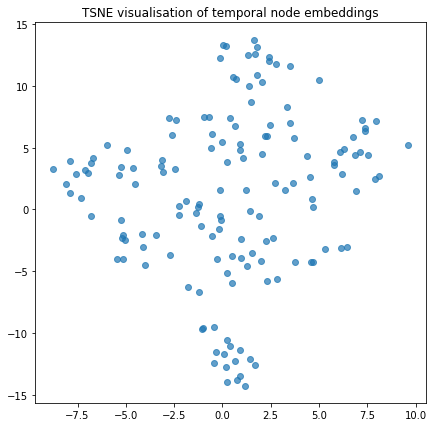

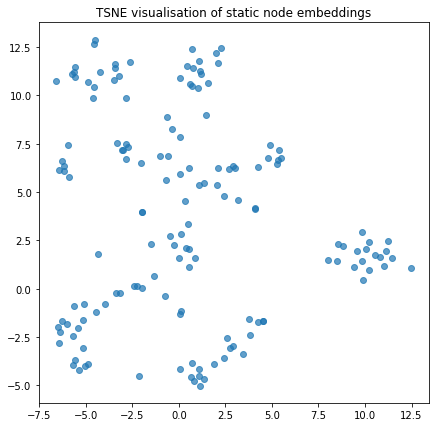

In [361]:
temporal_node_embeddings = temporal_model.wv.vectors
static_node_embeddings = static_model.wv.vectors
plot_tsne("TSNE visualisation of temporal node embeddings", temporal_node_embeddings)
plot_tsne("TSNE visualisation of static node embeddings", static_node_embeddings)

### Link Prediction using Node Embeddings

The node embeddings we've generated can now be used as input for a link prediction task. The reported AUC scores from the reference paper for this dataset are:

* Node2Vec: 0.759 
* CTDNE: 0.777

It turns out both the Node2Vec and CTDNE in this notebook perform much better than the paper. We may not have exactly reproduced the conditions under which the paper was testing.

Below are a set of helper functions we can use to train and evaluate a link prediction classifier. The rest of the notebook will use the binary operator defined in the cell below.

Other commonly used binary operators are `hadamard`, `average`, and `L1` operators. Alternatively, other user defined function taking two node embeddings to produce a link embedding could be used, but may affect convergence of the classifier model.

In [373]:
def operator_l2(u, v):
    return (u - v) ** 2


binary_operator = operator_l2

In [374]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler


def link_examples_to_features(link_examples, transform_node):
    op_func = (
        operator_func[binary_operator]
        if isinstance(binary_operator, str)
        else binary_operator
    )
    return [
        op_func(transform_node(src), transform_node(dst)) for src, dst in link_examples
    ]


def link_prediction_classifier(max_iter=2000):
    lr_clf = LogisticRegressionCV(Cs=10, cv=10, scoring="roc_auc", max_iter=max_iter)
    return Pipeline(steps=[("sc", StandardScaler()), ("clf", lr_clf)])


def evaluate_roc_auc(clf, link_features, link_labels):
    predicted = clf.predict_proba(link_features)

    # check which class corresponds to positive links
    positive_column = list(clf.classes_).index(1)
    return roc_auc_score(link_labels, predicted[:, positive_column])

We'll create some positive and negative examples to train our classifier on. The negative examples can be randomly generated from the available nodes in the graph.

In [375]:
def labelled_links(positive_examples, negative_examples):
    return (
        positive_examples + negative_examples,
        np.repeat([1, 0], [len(positive_examples), len(negative_examples)]),
    )


link_examples, link_labels = labelled_links(pos, neg)
link_examples_test, link_labels_test = labelled_links(pos_test, neg_test)

### Link prediction classifier using temporal embeddings

In [376]:
temporal_clf = link_prediction_classifier()
temporal_link_features = link_examples_to_features(link_examples, temporal_embedding)
temporal_link_features_test = link_examples_to_features(
    link_examples_test, temporal_embedding
)
temporal_clf.fit(temporal_link_features, link_labels)
temporal_score = evaluate_roc_auc(
    temporal_clf, temporal_link_features_test, link_labels_test
)

print(f"Score (ROC AUC): {temporal_score:.2f}")

Score (ROC AUC): 0.96


### Link prediction classifier using static embeddings

In [377]:
static_clf = link_prediction_classifier()
static_link_features = link_examples_to_features(link_examples, static_embedding)
static_link_features_test = link_examples_to_features(
    link_examples_test, static_embedding
)
static_clf.fit(static_link_features, link_labels)
static_score = evaluate_roc_auc(static_clf, static_link_features_test, link_labels_test)

print(f"Score (ROC AUC): {static_score:.2f}")

Score (ROC AUC): 0.96


### Link Embedding Visualisation

As with the nodes, we can visualise the embeddings for each link to see how the positive links (with class `1` ) are reasonably well clustered and similarly for the false links (with class `0` ).

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


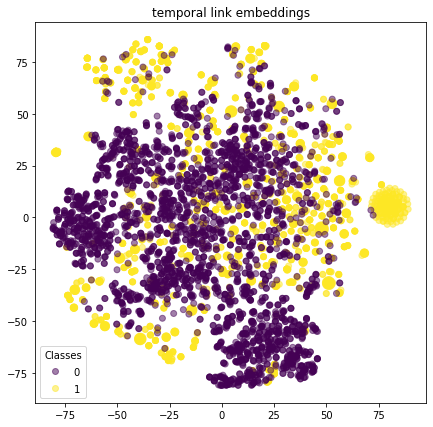

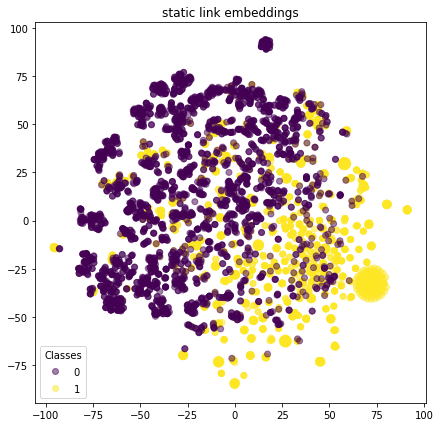

In [378]:
plot_tsne("temporal link embeddings", temporal_link_features_test, link_labels_test)
plot_tsne("static link embeddings", static_link_features_test, link_labels_test)

# Deep Learning with Graphs

Early Graph Neural Networks used tree based approaches, only being able to deal with directed acyclic graphs. Soon after RNN based approaches made progress, being able to deal with cyclic scenarios. Today, the state of the art has become graph convolutional neural networks, which we explore in this section.

Graph Convolutional Neural Networks capture local structure by utilizing a convolution not shaped like a tile of pixels, but the neighborhood of each node in a graph. For these models, the goal is then to learn a function of features on a graph that takes as input a feature description for every node and a description of the graph structure in matrix form; typically in the form of an adjacency matrix between nodes. Such models have become widely used for edge prediction, network partitioning and the simulation of network processes (e.g., diffusion) (Duvenaud et al. 2015).

- [Introduction to Graph Convolutional Neural Networks](http://tkipf.github.io/graph-convolutional-networks/)
- [A Gentle Introduction to Deep Learning for Graphs](https://arxiv.org/pdf/1912.12693.pdf)
- [Blog Post on Deep Learning for Graphs](https://medium.com/syncedreview/introduction-to-deep-learning-for-graphs-and-where-it-may-be-heading-75d48f42a322#:~:text=The%20deep%20learning%20for%20graphs,of%20natural%20language%20processing%20applications.)
- [Deep Learning on Graphs: a survey](https://arxiv.org/abs/1812.04202)
- [Graph neural networks: A review of methods and applications](https://arxiv.org/pdf/1812.08434.pdf)
- [A Comprehensive Survey on Graph Neural Networks](https://arxiv.org/pdf/1901.00596.pdf)

We will be using PyTorch Geometric ([code](https://github.com/rusty1s/pytorch_geometric), [documentation](https://pytorch-geometric.readthedocs.io/en/latest/)) for all of our purposes, but it is also worth checking out:


- Deep Graph Library - https://github.com/dmlc/dgl
- StellarGraph - https://github.com/stellargraph/stellargraph


Note: if you are more comfortable with PyTorch, then PyTorch geometric should be your choice - otherwise, StellarGraph has many of the algorithms implemented but using a Keras/Tensorflow framework. StellarGraph also has many intensive examples and demos for you to use.


## Using PyTorch_geometric for Deep Learning on Graphs

The following 4 examples (graph embedding, node classification, graph classification, and point cloud classification) are all taken from the PyTorch geometric docs. 


In [384]:
# Install required packages.
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
  Using cached torch_scatter-2.0.9.tar.gz (21 kB)
  Created wheel for torch-scatter: filename=torch_scatter-2.0.9-cp37-cp37m-linux_x86_64.whl size=279639 sha256=ab46b8515f271d94d77feeb6e6790b629d4470759dbb08ba5b4b7c97a6c99fa5
  Stored in directory: /root/.cache/pip/wheels/dd/57/a3/42ea193b77378ce634eb9454c9bc1e3163f3b482a35cdee4d1
Successfully built torch-scatter
Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
  Using cached torch_sparse-0.6.13.tar.gz (48 kB)
  Created wheel for torch-sparse: filename=torch_sparse-0.6.13-cp37-cp37m-linux_x86_64.whl size=501789 sha256=95c440733bd21a97e61829236bd22809478b5e6a6a46e84ab7efbde083ec7865
  Stored in directory: /root/.cache/pip/wheels/e0/01/be/6b2966e0ff20bb023ae35e5d17903e6e5b4df46dd5892f6be6
Successfully built torch-sparse


In [385]:
# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt


def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

## Introduction

Recently, deep learning on graphs has emerged to become one of the hottest research fields in the deep learning community.
Here, **Graph Neural Networks (GNNs)** aim to generalize classical deep learning concepts to irregular structured data (in contrast to images or texts) and to enable neural networks to reason about objects and their relations.

This is done by following a simple **neural message passing scheme**, where node features $\mathbf{x}_v^{(\ell)}$ of all nodes $v \in \mathcal{V}$ in a graph $\mathcal{G} = (\mathcal{V}, \mathcal{E})$ are iteratively updated by aggregating localized information from their neighbors $\mathcal{N}(v)$:

$$
\mathbf{x}_v^{(\ell + 1)} = f^{(\ell + 1)}_{\theta} \left( \mathbf{x}_v^{(\ell)}, \left\{ \mathbf{x}_w^{(\ell)} : w \in \mathcal{N}(v) \right\} \right)
$$

This tutorial will introduce you to some fundamental concepts regarding deep learning on graphs via Graph Neural Networks based on the **[PyTorch Geometric (PyG) library](https://github.com/rusty1s/pytorch_geometric)**.
PyTorch Geometric is an extension library to the popular deep learning framework [PyTorch](https://pytorch.org/), and consists of various methods and utilities to ease the implementation of Graph Neural Networks.

Following [Kipf et al. (2017)](https://arxiv.org/abs/1609.02907), let's dive into the world of GNNs by looking at a simple graph-structured example, the well-known [**Zachary's karate club network**](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). This graph describes a social network of 34 members of a karate club and documents links between members who interacted outside the club. Here, we are interested in detecting communities that arise from the member's interaction.

PyTorch Geometric provides an easy access to this dataset via the [`torch_geometric.datasets`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets) subpackage:

In [386]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


After initializing the [`KarateClub`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub) dataset, we first inspect some of its properties.
For example, we can see that this dataset holds exactly **one graph**, and that each node in this dataset is assigned a **34-dimensional feature vector** (that uniquely describes members of the karate club).
Furthermore, the graph holds exactly **4 classes**, which represent the community to which each node belongs.

Let's now look at the underlying graph in more detail:

In [387]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'contains_isolated_nodes' is deprecated, use 'has_isolated_nodes' instead
  warnings.warn(out)
/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'contains_self_loops' is deprecated, use 'has_self_loops' instead
  warnings.warn(out)


Each graph in PyTorch Geometric is represented by a single [`Data`](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data) object, which holds all information required to describe its graph representation.
We can print the data object anytime via `print(data)` to receive a short summary about its attributes and their shapes:
```
Data(edge_index=[2, 156], x=[34, 34], y=[34], train_mask=[34])
```
We can see that this `data` object holds 4 attributes:
(1) The `edge_index` property holds the information about the **graph connectivity**, *i.e.*, a tuple of source and destination node indices for each edge.
PyG further refers to (2) **node features** as `x` (each of the 34 nodes is assigned a 34-dim feature vector), and to (3) **node labels** as `y` (each node is assigned to exactly one class).
(4) There also exists an additional attribute called `train_mask`, which describes for which nodes we already know their community assigments.
In total, we are only aware of the ground-truth labels of 4 nodes (one for each community), and the task is to infer the community assignment for the remaining nodes.

The `data` object also provides some **utility functions** to infer some basic properties of the underlying graph.
For example, we can easily infer whether there exists isolated nodes in the graph (*i.e.* there exists no edge to any node), whether the graph contains self-loops (*i.e.*, $(v, v) \in \mathcal{E}$), or whether the graph is undirected (*i.e.*, for each edge $(v, w) \in \mathcal{E}$ there also exists the edge $(w, v) \in \mathcal{E}$).

Let us now inspect the `edge_index` property in more detail:

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())

<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

By printing `edge_index`, we can further understand how PyG represents graph connectivity internally.
We see that for each edge, `edge_index` holds a tuple of two node indices, where the first value describes the node index of the source node and the second value describes the node index of the destination node of an edge.

This representation is known as the **COO format (coordinate format)** commonly used for representing sparse matrices.
Instead of holding the adjacency information in a dense representation $\mathbf{A} \in \{ 0, 1 \}^{|\mathcal{V}| \times |\mathcal{V}|}$, PyG represents graphs sparsely, which refers to only holding the coordinates/values for which entries in $\mathbf{A}$ are non-zero.

We can further visualize the graph by converting it to the `networkx` library format, which implements, in addition to graph manipulation functionalities, powerful tools for visualization:

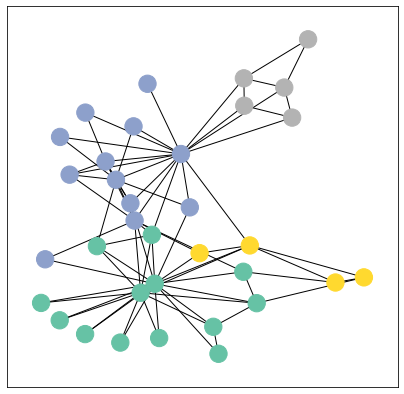

In [388]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

## Implementing Graph Neural Networks

Ater learning about PyG's data handling, it's time to implement our first Graph Neural Network!

For this, we will use on of the most simple GNN operators, the **GCN layer** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)), which is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \sum_{w \in \mathcal{N}(v) \, \cup \, \{ v \}} \frac{1}{c_{w,v}} \cdot \mathbf{x}_w^{(\ell)}
$$

where $\mathbf{W}^{(\ell + 1)}$ denotes a trainable weight matrix of shape `[num_output_features, num_input_features]` and $c_{w,v}$ refers to a fixed normalization coefficient for each edge.

PyG implements this layer via [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv), which can be executed by passing in the node feature representation `x` and the COO graph connectivity representation `edge_index`.

With this, we are ready to create our first Graph Neural Network by defining our network architecture in a `torch.nn.Module` class:

In [392]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


Here, we first initialize all of our building blocks in `__init__` and define the computation flow of our network in `forward`.
We first define and stack **three graph convolution layers**, which corresponds to aggregating 3-hop neighborhood information around each node (all nodes up to 3 "hops" away).
In addition, the `GCNConv` layers reduce the node feature dimensionality to $2$, *i.e.*, $34 \rightarrow 4 \rightarrow 4 \rightarrow 2$. Each `GCNConv` layer is enhanced by a [tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html?highlight=tanh#torch.nn.Tanh) non-linearity.

After that, we apply a single linear transformation ([`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear)) that acts as a classifier to map our nodes to 1 out of the 4 classes/communities.

We return both the output of the final classifier as well as the final node embeddings produced by our GNN.
We proceed to initialize our final model via `GCN()`, and printing our model produces a summary of all its used sub-modules.


### Embedding the Karate Club Network

Let's take a look at the node embeddings produced by our GNN.
Here, we pass in the initial node features `x` and the graph connectivity information `edge_index` to the model, and visualize its 2-dimensional embedding.

Embedding shape: [34, 2]


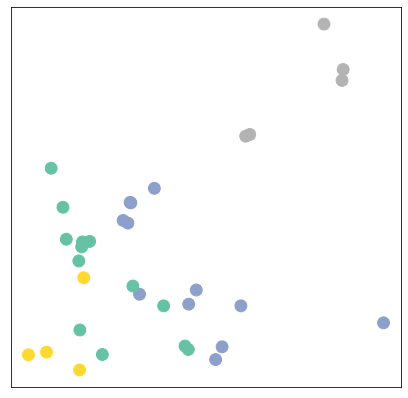

In [393]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

Remarkably, even before training the weights of our model, the model produces an embedding of nodes that closely resembles the community-structure of the graph.
Nodes of the same color (community) are already closely clustered together in the embedding space, although the weights of our model are initialized **completely at random** and we have not yet performed any training so far!
This leads to the conclusion that GNNs introduce a strong inductive bias, leading to similar embeddings for nodes that are close to each other in the input graph.

### Training on the Karate Club Network

But can we do better? Let's look at an example on how to train our network parameters based on the knowledge of the community assignments of 4 nodes in the graph (one for each community):

Because everything in our model is differentiable and parameterized, we can add some labels, train the model and observe how the embeddings react.
Here, we make use of a semi-supervised or transductive learning procedure: We simply train against one node per class, but are allowed to make use of the complete input graph data.

Training our model is very similar to any other PyTorch model.
In addition to defining our network architecture, we define a loss critertion (here, [`CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)) and initialize a stochastic gradient optimizer (here, [`Adam`](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam)).
After that, we perform multiple rounds of optimization, where each round consists of a forward and backward pass to compute the gradients of our model parameters w.r.t. to the loss derived from the forward pass.
If you are not new to PyTorch, this scheme should appear familar to you. 
Otherwise, the PyTorch docs provide [a good introduction on how to train a neural network in PyTorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-loss-function-and-optimizer).

Note that our semi-supervised learning scenario is achieved by the following line:
```
loss = criterion(out[data.train_mask], data.y[data.train_mask])
```
While we compute node embeddings for all of our nodes, we **only make use of the training nodes for computing the loss**.
Here, this is implemented by filtering the output of the classifier `out` and ground-truth labels `data.y` to only contain the nodes in `train_mask`.

Let us now start training and see how our node embeddings evolve over time (best experienced by explicitely running the code):

<IPython.core.display.Javascript object>

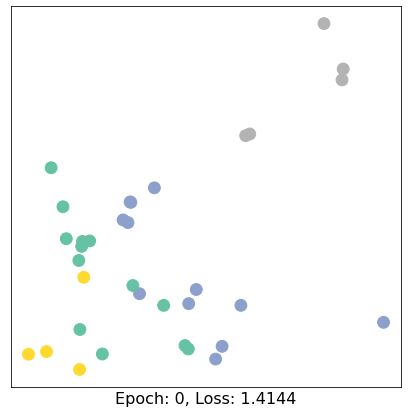

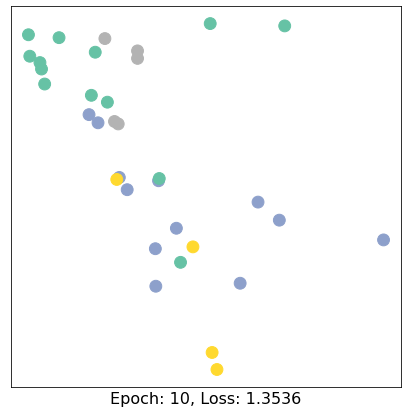

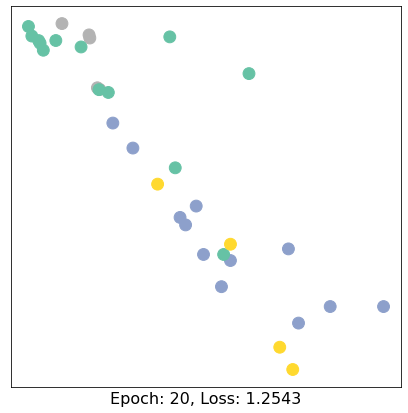

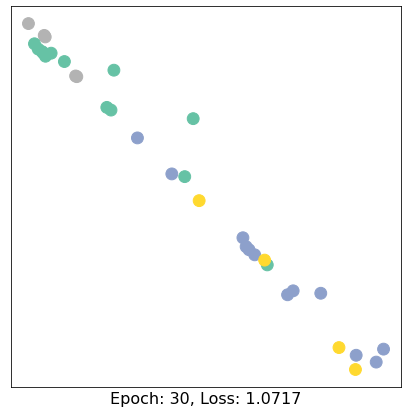

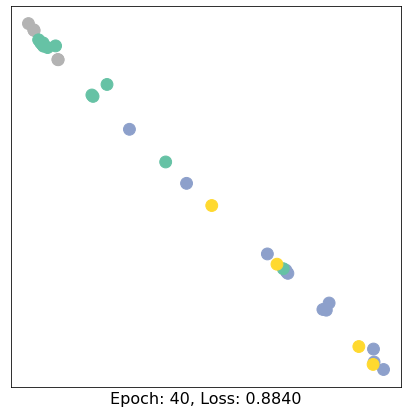

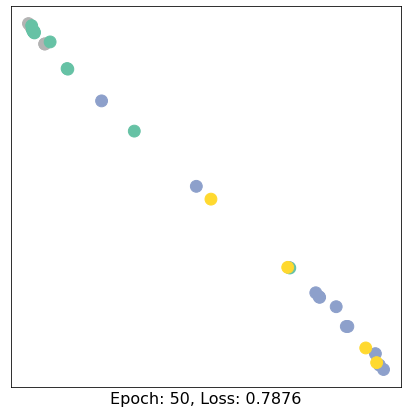

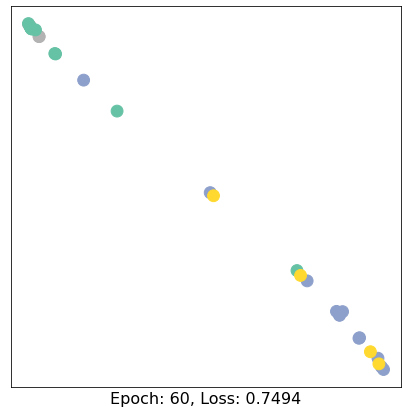

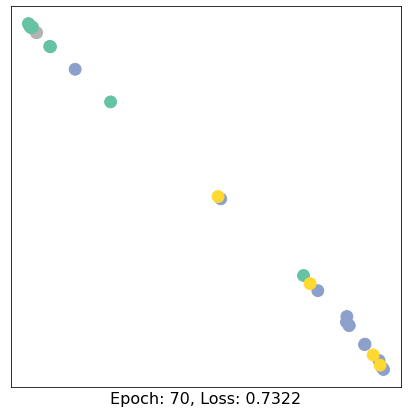

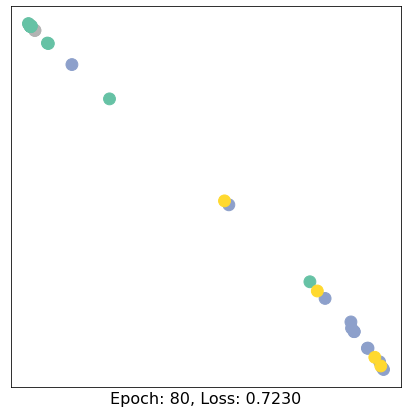

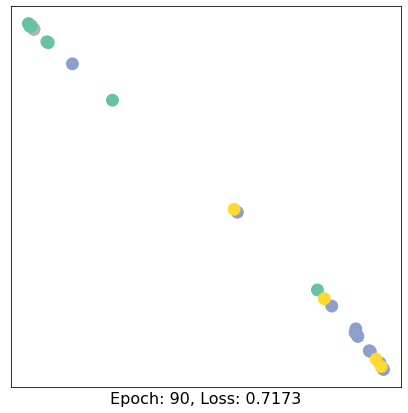

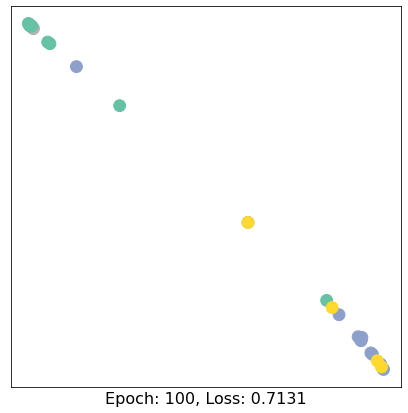

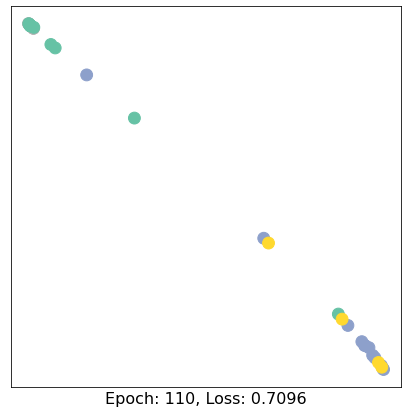

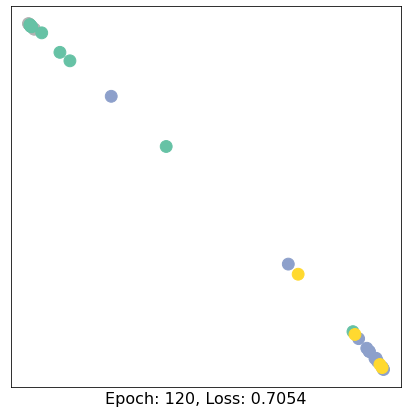

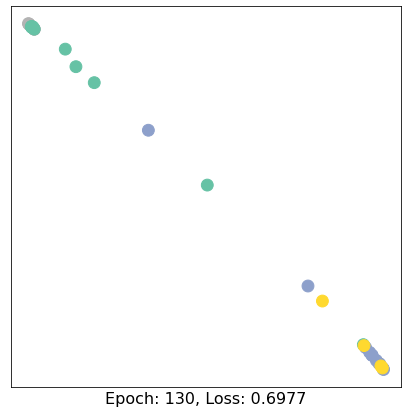

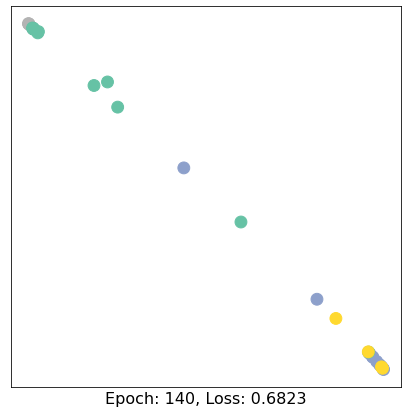

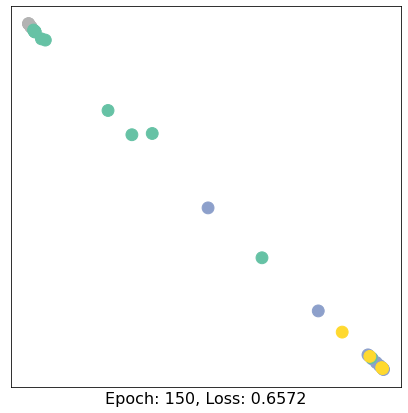

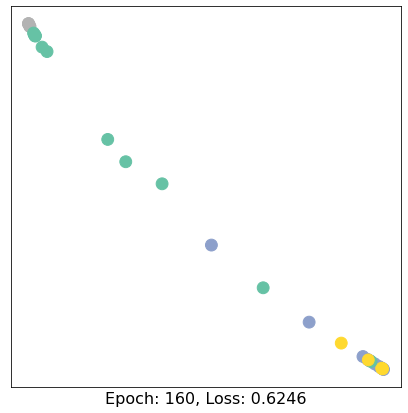

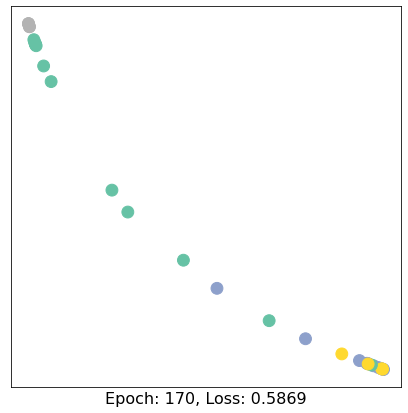

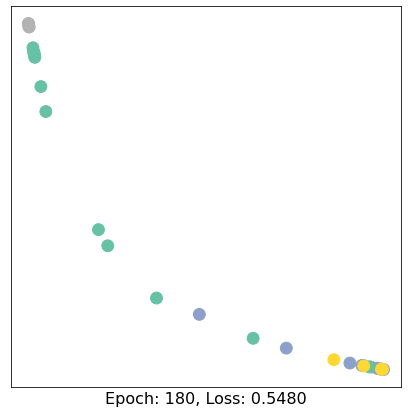

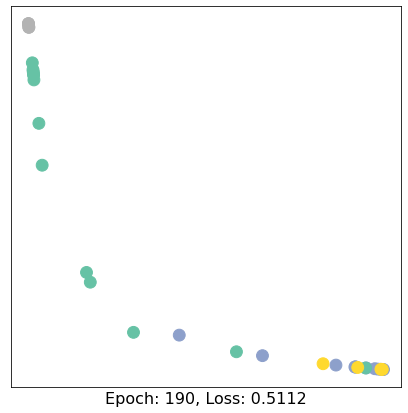

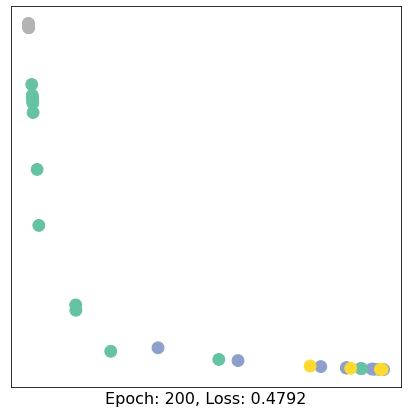

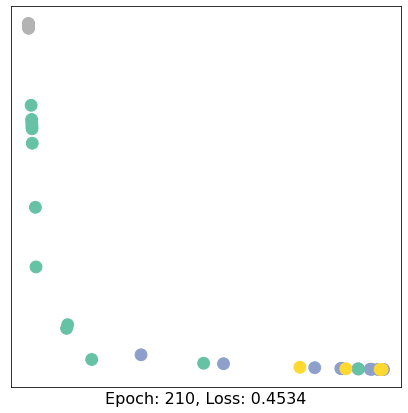

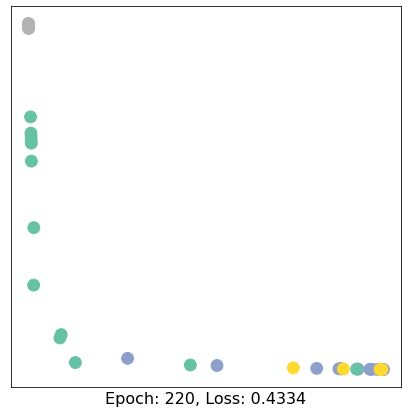

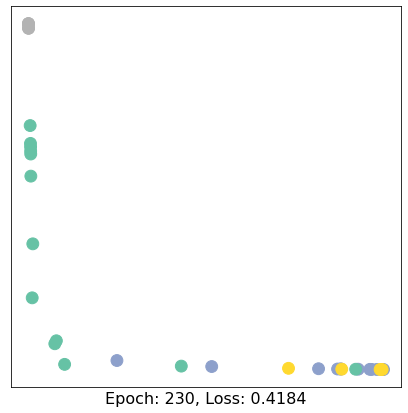

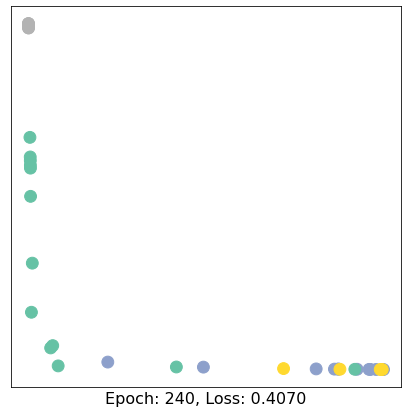

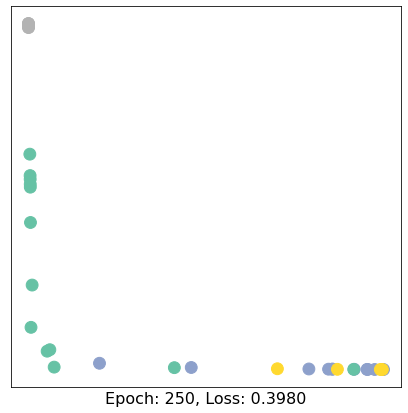

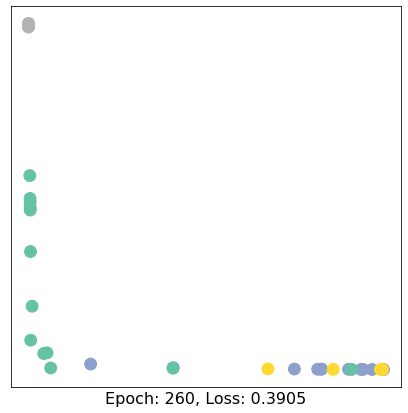

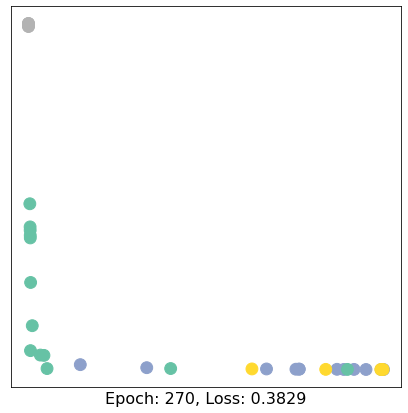

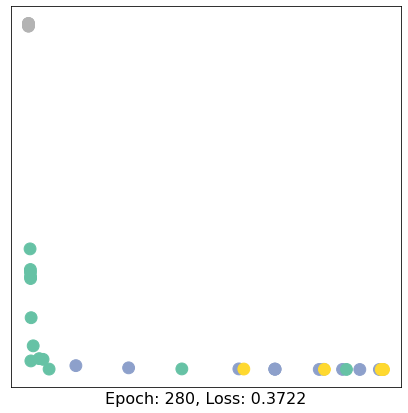

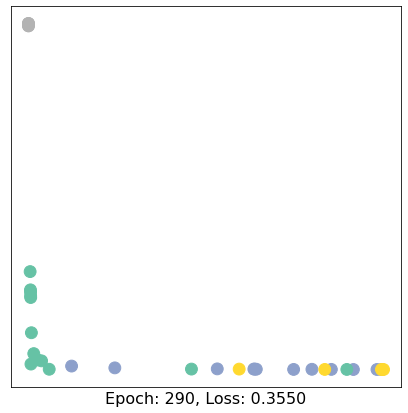

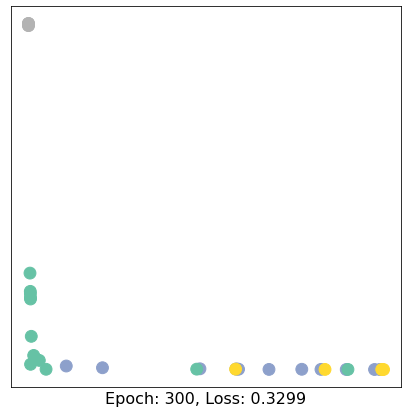

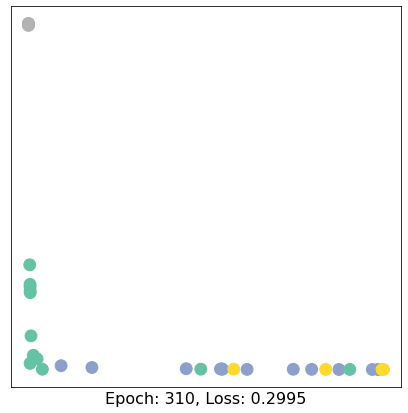

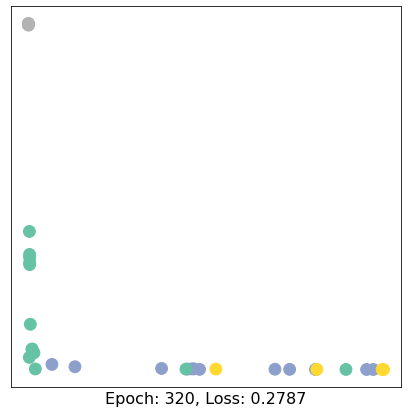

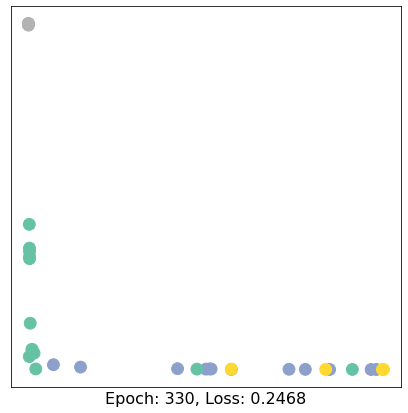

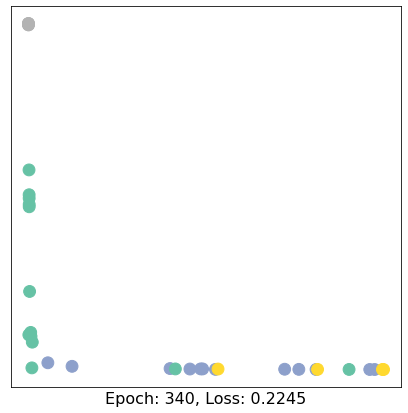

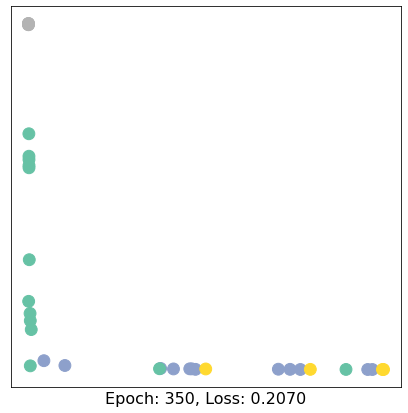

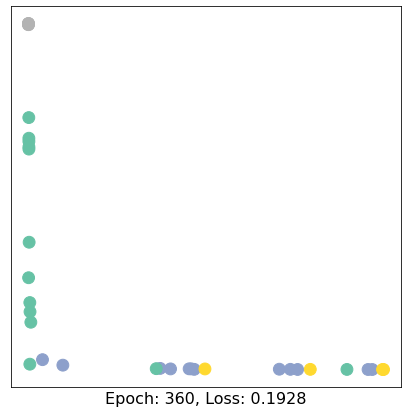

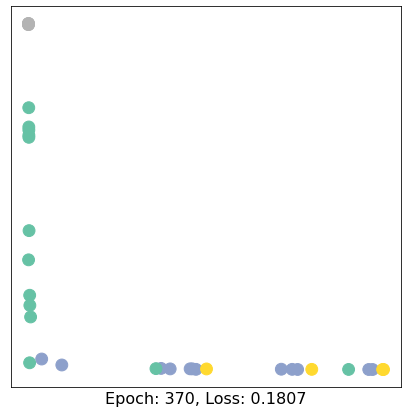

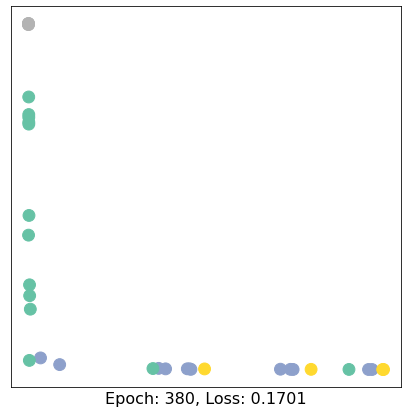

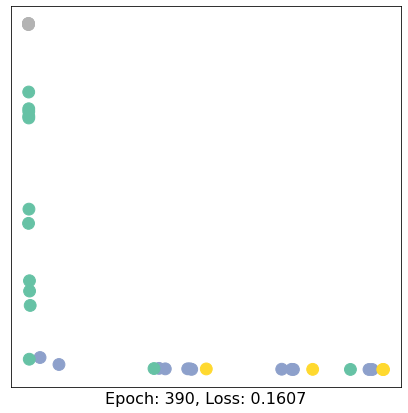

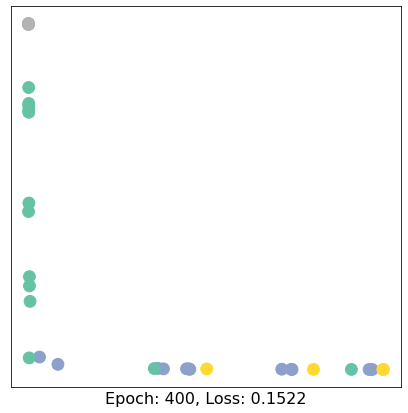

In [396]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

for epoch in range(401):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

In [398]:
data.y

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])

In [399]:
out, h = model(data.x, data.edge_index)

In [402]:
out.argmax(axis=1)

tensor([1, 2, 2, 2, 3, 3, 3, 2, 0, 0, 3, 1, 1, 1, 3, 3, 3, 1, 3, 0, 3, 1, 3, 1,
        2, 2, 0, 2, 1, 0, 0, 2, 0, 0])

As one can see, our 3-layer GCN model manages to linearly separate the communities and classify most nodes correctly.

Furthermore, we did this all with a few lines of code, thanks to the PyTorch Geometric library which helped us out with data handling and GNN implementations.

## Conclusion

This concludes the first introduction into the world of GNNs and PyTorch Geometric.
In the follow-up sessions, you will learn how to achieve state-of-the-art classification results on a number of real-world graph datasets.

[Next: Node Classification with Graph Neural Networks](https://colab.research.google.com/drive/14OvFnAXggxB8vM4e8vSURUp1TaKnovzX)


## Node Classification with Graph Neural Networks

[Previous: Introduction: Hands-on Graph Neural Networks](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8)

Here we teach you how to apply **Graph Neural Networks (GNNs) to the task of node classification**.
We are given the ground-truth labels of only a small subset of nodes, and want to infer the labels for all the remaining nodes (*transductive learning*).

To demonstrate, we make use of the `Cora` dataset, which is a **citation network** where nodes represent documents.
Each node is described by a 1433-dimensional bag-of-words feature vector.
Two documents are connected if there exists a citation link between them.
The task is to infer the category of each document (7 in total).

This dataset was first introduced by [Yang et al. (2016)](https://arxiv.org/abs/1603.08861) as one of the datasets of the `Planetoid` benchmark suite.
We again can make use [PyTorch Geometric](https://github.com/rusty1s/pytorch_geometric) for an easy access to this dataset via [`torch_geometric.datasets.Planetoid`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.Planetoid):

In [ ]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

print()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('===========================================================================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


Processing...
Done!


Overall, this dataset is quite similar to the previously used [`KarateClub`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub) network.
We can see that the `Cora` network holds 2,708 nodes and 10,556 edges, resulting in an average node degree of 3.9.
For training this dataset, we are given the ground-truth categories of 140 nodes (20 for each class).
This results in a training node label rate of only 5%.

In contrast to `KarateClub`, this graph holds the additional attributes `val_mask` and `test_mask`, which denotes the nodes that should be used for validation and testing.
Furthermore, we make use of **[data transformations](https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html#data-transforms) via `transform=NormalizeFeatures()`**.
Transforms can be used to modify your input data before inputting them into a neural network, *e.g.*, for normalization or data augmentation.
Here, we [row-normalize](https://pytorch-geometric.readthedocs.io/en/latest/modules/transforms.html#torch_geometric.transforms.NormalizeFeatures) the bag-of-words input feature vectors.

We can further see that this network is undirected, and that there exists no isolated nodes (each document has at least one citation).

### Training a Multi-layer Perception Network (MLP)

In theory, we should be able to infer the category of a document solely based on its content, *i.e.* its bag-of-words feature representation, without taking any relational information into account.

Let's verify that by constructing a simple MLP that solely operates on input node features (using shared weights across all nodes):

In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(MLP, self).__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(dataset.num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=16)
print(model)

MLP(
  (lin1): Linear(in_features=1433, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=7, bias=True)
)


Our MLP is defined by two linear layers and enhanced by [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html?highlight=relu#torch.nn.ReLU) non-linearity and [dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html?highlight=dropout#torch.nn.Dropout).
Here, we first reduce the 1433-dimensional feature vector to a low-dimensional embedding (`hidden_channels=16`), while the second linear layer acts as a classifier that should map each low-dimensional node embedding to one of the 7 classes.

Let's train our simple MLP by following a similar procedure as described in [the first part of this tutorial](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8).
We again make use of the **cross entropy loss** and **Adam optimizer**.
This time, we also define a **`test` function** to evaluate how well our final model performs on the test node set (which labels have not been observed during training).

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = MLP(hidden_channels=16)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9615
Epoch: 002, Loss: 1.9557
Epoch: 003, Loss: 1.9505
Epoch: 004, Loss: 1.9423
Epoch: 005, Loss: 1.9327
Epoch: 006, Loss: 1.9279
Epoch: 007, Loss: 1.9144
Epoch: 008, Loss: 1.9087
Epoch: 009, Loss: 1.9023
Epoch: 010, Loss: 1.8893
Epoch: 011, Loss: 1.8776
Epoch: 012, Loss: 1.8594
Epoch: 013, Loss: 1.8457
Epoch: 014, Loss: 1.8365
Epoch: 015, Loss: 1.8280
Epoch: 016, Loss: 1.7965
Epoch: 017, Loss: 1.7984
Epoch: 018, Loss: 1.7832
Epoch: 019, Loss: 1.7495
Epoch: 020, Loss: 1.7441
Epoch: 021, Loss: 1.7188
Epoch: 022, Loss: 1.7124
Epoch: 023, Loss: 1.6785
Epoch: 024, Loss: 1.6660
Epoch: 025, Loss: 1.6119
Epoch: 026, Loss: 1.6236
Epoch: 027, Loss: 1.5827
Epoch: 028, Loss: 1.5784
Epoch: 029, Loss: 1.5524
Epoch: 030, Loss: 1.5020
Epoch: 031, Loss: 1.5065
Epoch: 032, Loss: 1.4742
Epoch: 033, Loss: 1.4581
Epoch: 034, Loss: 1.4246
Epoch: 035, Loss: 1.4131
Epoch: 036, Loss: 1.4112
Epoch: 037, Loss: 1.3923
Epoch: 038, Loss: 1.3055
Epoch: 039, Loss: 1.2982
Epoch: 040, Loss: 1.2543


After training the model, we can call the `test` function to see how well our model performs on unseen labels.
Here, we are interested in the accuracy of the model, *i.e.*, the ratio of correctly classified nodes:

In [ ]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.5900


As one can see, our MLP performs rather bad with only about 59% test accuracy.
But why does the MLP do not perform better?
The main reason for that is that this model suffers from heavy overfitting due to only a **small amount of training nodes**, and therefore generalizes poorly to unseen node representations.

It also fails to incorporate an important bias into the model: **Cited papers are very likely related to the category of a document**.
That is exactly where Graph Neural Networks come into play and can help to boost the performance of our model.



### Training a Graph Neural Network (GNN)

We can easily convert our MLP to a GNN by swapping the `torch.nn.Linear` layers with PyG's GNN operators.

Following-up on [the first part of this tutorial](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8), we replace the linear layers by the [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv) module.
To recap, the **GCN layer** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)) is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \sum_{w \in \mathcal{N}(v) \, \cup \, \{ v \}} \frac{1}{c_{w,v}} \cdot \mathbf{x}_w^{(\ell)}
$$

where $\mathbf{W}^{(\ell + 1)}$ denotes a trainable weight matrix of shape `[num_output_features, num_input_features]` and $c_{w,v}$ refers to a fixed normalization coefficient for each edge.
In contrast, a single linear layer is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \mathbf{x}_v^{(\ell)}
$$

which does not make use of neighboring node information.

In [ ]:
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(hidden_channels=16)
print(model)

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


Let's visualize the node embeddings of our **untrained** GCN network.
For visualization, we make use of [**TSNE**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to embed our 7-dimensional node embeddings onto a 2D plane.

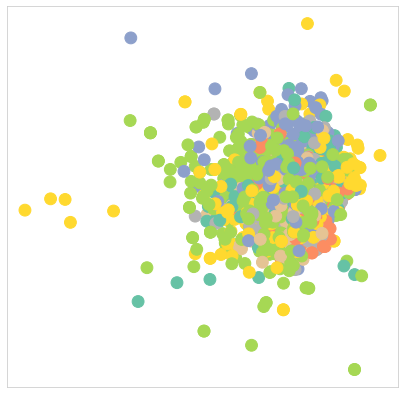

In [ ]:
model = GCN(hidden_channels=16)
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

As one can see, there is at least *some kind* of clustering (*e.g.*, for the "blue" nodes), but we certainly can do better by training our model.
The training and testing procedure is once again the same, but this time we make use of the node features `x` **and** the graph connectivity `edge_index` as input to our GCN model.

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc


for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9460
Epoch: 002, Loss: 1.9412
Epoch: 003, Loss: 1.9363
Epoch: 004, Loss: 1.9308
Epoch: 005, Loss: 1.9216
Epoch: 006, Loss: 1.9137
Epoch: 007, Loss: 1.9078
Epoch: 008, Loss: 1.8986
Epoch: 009, Loss: 1.8868
Epoch: 010, Loss: 1.8825
Epoch: 011, Loss: 1.8701
Epoch: 012, Loss: 1.8614
Epoch: 013, Loss: 1.8486
Epoch: 014, Loss: 1.8323
Epoch: 015, Loss: 1.8344
Epoch: 016, Loss: 1.8186
Epoch: 017, Loss: 1.8031
Epoch: 018, Loss: 1.7980
Epoch: 019, Loss: 1.7813
Epoch: 020, Loss: 1.7766
Epoch: 021, Loss: 1.7478
Epoch: 022, Loss: 1.7385
Epoch: 023, Loss: 1.7304
Epoch: 024, Loss: 1.7120
Epoch: 025, Loss: 1.7010
Epoch: 026, Loss: 1.6917
Epoch: 027, Loss: 1.6672
Epoch: 028, Loss: 1.6382
Epoch: 029, Loss: 1.6474
Epoch: 030, Loss: 1.6297
Epoch: 031, Loss: 1.6014
Epoch: 032, Loss: 1.5760
Epoch: 033, Loss: 1.5732
Epoch: 034, Loss: 1.5705
Epoch: 035, Loss: 1.5443
Epoch: 036, Loss: 1.5131
Epoch: 037, Loss: 1.4721
Epoch: 038, Loss: 1.4774
Epoch: 039, Loss: 1.4380
Epoch: 040, Loss: 1.4553


After training the model, we can check its test accuracy:

In [ ]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.8080


**There it is!**
By simply swapping the linear layers with GNN layers, we can reach **81.4% of test accuracy**!
This is in stark contrast to the 59% of test accuracy obtained by our MLP, indicating that relational information plays a crucial role in obtaining better performance.

We can also verify that once again by looking at the output embeddings of our **trained** model, which now produces a far better clustering of nodes of the same category.

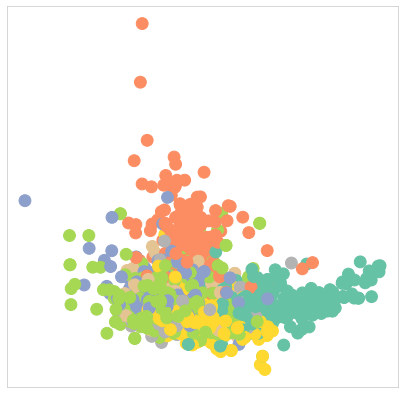

In [ ]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

## Conclusion

Here you have seen how to apply GNNs to real-world problems, and, in particular, how they can effectively be used for boosting a model's performance.
In the next section, we will look into how GNNs can be used for the task of graph classification.

[Next: Graph Classification with Graph Neural Networks](https://colab.research.google.com/drive/1I8a0DfQ3fI7Njc62__mVXUlcAleUclnb)

## Graph Classification with Graph Neural Networks

In this tutorial session we take a closer look at how to apply **Graph Neural Networks (GNNs) to the task of graph classification**.
Graph classification refers to the problem of classifiying entire graphs (in contrast to nodes), given a **dataset of graphs**, based on some structural graph properties.
Here, we want to embed entire graphs, and we want to embed those graphs in such a way so that they are linearly separable given a task at hand.

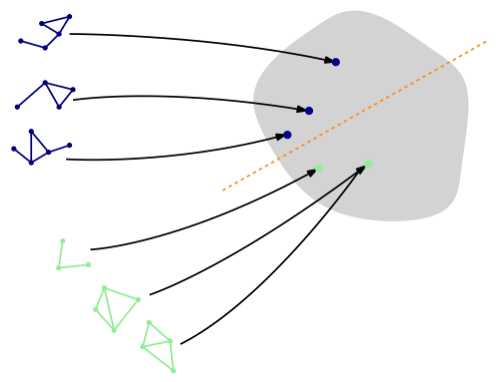

A common task for graph classification is **molecular property prediction**, in which molecules are represented as graphs, and the task may be to infer whether a molecule inhibits HIV virus replication or not. These can be trivially extended to social settings by classifying clique structures in online or in-person social networks.

The TU Dortmund University has collected a wide range of different graph classification datasets, known as the [**TUDatasets**](https://chrsmrrs.github.io/datasets/), which are also accessible via [`torch_geometric.datasets.TUDataset`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.TUDataset) in PyTorch Geometric.
Let's load and inspect one of the smaller ones, the **MUTAG dataset**:

In [ ]:
import torch
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='data/TUDataset', name='MUTAG')

print()
print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Dataset: MUTAG(188):
Number of graphs: 188
Number of features: 7
Number of classes: 2

Data(edge_index=[2, 38], x=[17, 7], edge_attr=[38, 4], y=[1])
Number of nodes: 17
Number of edges: 38
Average node degree: 2.24
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


Extracting data/TUDataset/MUTAG/MUTAG.zip
Processing...
Done!


This dataset provides **188 different graphs**, and the task is to classify each graph into **one out of two classes**.

By inspecting the first graph object of the dataset, we can see that it comes with **17 nodes (with 7-dimensional feature vectors)** and **38 edges** (leading to an average node degree of 2.24).
It also comes with exactly **one graph label** (`y=[1]`), and, in addition to previous datasets, provides addtional **4-dimensional edge features** (`edge_attr=[38, 4]`).
However, for the sake of simplicity, we will not make use of those.

PyTorch Geometric provides some useful utilities for working with graph datasets, *e.g.*, we can shuffle the dataset and use the first 150 graphs as training graphs, while using the remaining ones for testing:

In [ ]:
torch.manual_seed(12345)
dataset = dataset.shuffle()

train_dataset = dataset[:150]
test_dataset = dataset[150:]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 150
Number of test graphs: 38


### Mini-batching of graphs

Because graphs in graph classification datasets are usually small, a good idea is to **batch the graphs** before inputting them into a Graph Neural Network to guarantee full GPU utilization.
In the image or language domain, this procedure is typically achieved by **rescaling** or **padding** each example into a set of equally-sized shapes, and examples are then grouped in an additional dimension.
The length of this dimension is then equal to the number of examples grouped in a mini-batch and is typically referred to as the `batch_size`.

However, for GNNs the two approaches described above are either not feasible or may result in a lot of unnecessary memory consumption.
Therefore, PyTorch Geometric opts for another approach to achieve parallelization across a number of examples. Here, adjacency matrices are stacked in a diagonal fashion (creating a giant graph that holds multiple isolated subgraphs), and node and target features are simply concatenated in the node dimension:

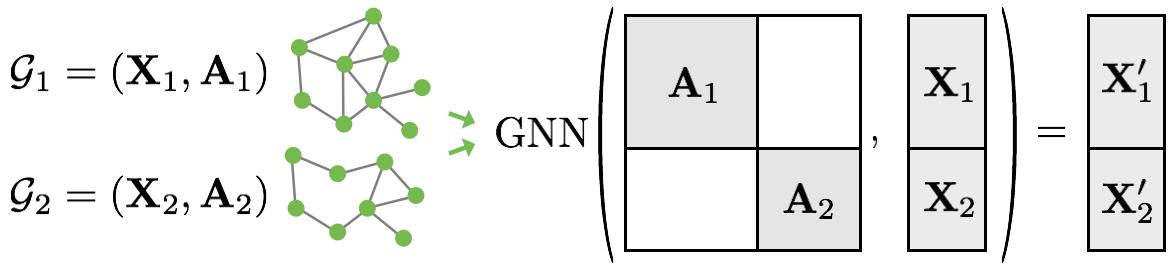

This procedure has some crucial advantages over other batching procedures:

1. GNN operators that rely on a message passing scheme do not need to be modified since messages are not exchanged between two nodes that belong to different graphs.

2. There is no computational or memory overhead since adjacency matrices are saved in a sparse fashion holding only non-zero entries, *i.e.*, the edges.

PyTorch Geometric automatically takes care of **batching multiple graphs into a single giant graph** with the help of the [`torch_geometric.data.DataLoader`](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.DataLoader) class:

In [ ]:
from torch_geometric.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Step 1:
Number of graphs in the current batch: 64
DataBatch(edge_index=[2, 2636], x=[1188, 7], edge_attr=[2636, 4], y=[64], batch=[1188], ptr=[65])

Step 2:
Number of graphs in the current batch: 64
DataBatch(edge_index=[2, 2506], x=[1139, 7], edge_attr=[2506, 4], y=[64], batch=[1139], ptr=[65])

Step 3:
Number of graphs in the current batch: 22
DataBatch(edge_index=[2, 852], x=[387, 7], edge_attr=[852, 4], y=[22], batch=[387], ptr=[23])



Here, we opt for a `batch_size` of 64, leading to 3 (randomly shuffled) mini-batches, containing all $2 \cdot 64+22 = 150$ graphs.

Furthermore, each `Batch` object is equipped with a **`batch` vector**, which maps each node to its respective graph in the batch:

$$
\textrm{batch} = [ 0, \ldots, 0, 1, \ldots, 1, 2, \ldots ]
$$

### Training a Graph Neural Network (GNN)

Training a GNN for graph classification usually follows a simple recipe:

1. Embed each node by performing multiple rounds of message passing
2. Aggregate node embeddings into a unified graph embedding (**readout layer**)
3. Train a final classifier on the graph embedding

There exists multiple **readout layers** in literature, but the most common one is to simply take the average of node embeddings:

$$
\mathbf{x}_{\mathcal{G}} = \frac{1}{|\mathcal{V}|} \sum_{v \in \mathcal{V}} \mathcal{x}^{(L)}_v
$$

PyTorch Geometric provides this functionality via [`torch_geometric.nn.global_mean_pool`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.glob.global_mean_pool), which takes in the node embeddings of all nodes in the mini-batch and the assignment vector `batch` to compute a graph embedding of size `[batch_size, hidden_channels]` for each graph in the batch.

The final architecture for applying GNNs to the task of graph classification then looks as follows and allows for complete end-to-end training:

In [ ]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        
        return x

model = GCN(hidden_channels=64)
print(model)

GCN(
  (conv1): GCNConv(7, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)


Here, we again make use of the [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv) with $\mathrm{ReLU}(x) = \max(x, 0)$ activation for obtaining localized node embeddings, before we apply our final classifier on top of a graph readout layer.

Let's train our network for a few epochs to see how well it performs on the training as well as test set:

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
         out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
         loss = criterion(out, data.y)  # Compute the loss.
         loss.backward()  # Derive gradients.
         optimizer.step()  # Update parameters based on gradients.
         optimizer.zero_grad()  # Clear gradients.

def test(loader):
     model.eval()

     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data.x, data.edge_index, data.batch)  
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
     return correct / len(loader.dataset)  # Derive ratio of correct predictions.


for epoch in range(1, 201):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 002, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 003, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 004, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 005, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 006, Train Acc: 0.6533, Test Acc: 0.7368
Epoch: 007, Train Acc: 0.7467, Test Acc: 0.7632
Epoch: 008, Train Acc: 0.7267, Test Acc: 0.7632
Epoch: 009, Train Acc: 0.7200, Test Acc: 0.7632
Epoch: 010, Train Acc: 0.7133, Test Acc: 0.7895
Epoch: 011, Train Acc: 0.7200, Test Acc: 0.7632
Epoch: 012, Train Acc: 0.7200, Test Acc: 0.7895
Epoch: 013, Train Acc: 0.7200, Test Acc: 0.7895
Epoch: 014, Train Acc: 0.7133, Test Acc: 0.8421
Epoch: 015, Train Acc: 0.7133, Test Acc: 0.8421
Epoch: 016, Train Acc: 0.7533, Test Acc: 0.7368
Epoch: 017, Train Acc: 0.7400, Test Acc: 0.7632
Epoch: 018, Train Acc: 0.7133, Test Acc: 0.8421
Epoch: 019, Train Acc: 0.7400, Test Acc: 0.7895
Epoch: 020, Train Acc: 0.7533, Test Acc: 0.7368
Epoch: 021, Train Acc: 0.7467, Test Acc:

As one can see, our model reaches around **76% test accuracy**.
Reasons for the fluctations in accuracy can be explained by the rather small dataset (only 38 test graphs), and usually disappear once one applies GNNs to larger datasets.



Can we do better than this?
As multiple papers pointed out ([Xu et al. (2018)](https://arxiv.org/abs/1810.00826), [Morris et al. (2018)](https://arxiv.org/abs/1810.02244)), applying **neighborhood normalization decreases the expressivity of GNNs in distinguishing certain graph structures**.
An alternative formulation ([Morris et al. (2018)](https://arxiv.org/abs/1810.02244)) omits neighborhood normalization completely and adds a simple skip-connection to the GNN layer in order to preserve central node information:

$$
\mathbf{x}_v^{(\ell+1)} = \mathbf{W}^{(\ell + 1)}_1 \mathbf{x}_v^{(\ell)} + \mathbf{W}^{(\ell + 1)}_2 \sum_{w \in \mathcal{N}(v)} \mathbf{x}_w^{(\ell)}
$$

This layer is implemented under the name [`GraphConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GraphConv) in PyTorch Geometric.

If you complete the following code to use PyG's `GraphConv` rather than `GCNConv`, you should approach **82% test accuracy**.

In [ ]:
from torch_geometric.nn import GraphConv

class GNN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GNN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GraphConv(dataset.num_node_features, hidden_channels)
        self.conv2 = GraphConv(hidden_channels, hidden_channels)
        self.conv3 = GraphConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)

        x = global_mean_pool(x, batch)

        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        
        return x

model = GNN(hidden_channels=64)
print(model)

GNN(
  (conv1): GraphConv(7, 64)
  (conv2): GraphConv(64, 64)
  (conv3): GraphConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)


In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GNN(hidden_channels=64)
print(model)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(1, 201):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

<IPython.core.display.Javascript object>

GNN(
  (conv1): GraphConv(7, 64)
  (conv2): GraphConv(64, 64)
  (conv3): GraphConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)
Epoch: 001, Train Acc: 0.7333, Test Acc: 0.7895
Epoch: 002, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 003, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 004, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 005, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 006, Train Acc: 0.6533, Test Acc: 0.7368
Epoch: 007, Train Acc: 0.7333, Test Acc: 0.8158
Epoch: 008, Train Acc: 0.7267, Test Acc: 0.8158
Epoch: 009, Train Acc: 0.7867, Test Acc: 0.8421
Epoch: 010, Train Acc: 0.7733, Test Acc: 0.8158
Epoch: 011, Train Acc: 0.7733, Test Acc: 0.7895
Epoch: 012, Train Acc: 0.7933, Test Acc: 0.8421
Epoch: 013, Train Acc: 0.7733, Test Acc: 0.8421
Epoch: 014, Train Acc: 0.7733, Test Acc: 0.7895
Epoch: 015, Train Acc: 0.7933, Test Acc: 0.8421
Epoch: 016, Train Acc: 0.7667, Test Acc: 0.7632
Epoch: 017, Train Acc: 0.7933, Test Acc: 0.8421
Epoch: 018, Train Acc: 0.7867, T

### Conclusion

Here we have taught you to apply GNNs to the task of graph classification.
You have learned how graphs can be batched together for better GPU utilization, and how to apply readout layers for obtaining graph embeddings rather than node embeddings.

## Deep Unsupervised Networks for Graphs

In this section, we will be using StellarGraph to explore deep, unsupervised methods for graphs. While most of the methods we have seen so far are effective on fixed graphs as they are transductive in nature.

Recent work, such as the [GraphSAGE algorithm](http://snap.stanford.edu/graphsage/) has shown that is possible to create inductive algorithms that allow us to create embeddings on unseen graphs, after training on a set of graphs with similar attributes as those graphs we wish to embed.

We introduce two mini-tutorials ([Node representation learning with GraphSAGE](https://stellargraph.readthedocs.io/en/stable/demos/embeddings/graphsage-unsupervised-sampler-embeddings.html), [Node representation learning with Deep Graph Infomax](https://stellargraph.readthedocs.io/en/stable/demos/embeddings/deep-graph-infomax-embeddings.html)) from StellarGraph to explore unsupervised networks for graphs. 

The first notebook shows us how to use GraphSAGE to create embeddings for downstream tasks, and the second compares a series of unsupervised graph based deep learning approaches.

### Node representation learning with GraphSAGE and UnsupervisedSampler


Stellargraph Unsupervised GraphSAGE is the implementation of GraphSAGE method outlined in the paper: [Inductive Representation Learning on Large Graphs.](http://snap.stanford.edu/graphsage/) W.L. Hamilton, R. Ying, and J. Leskovec arXiv:1706.02216
[cs.SI], 2017. 

This section is a short demo of how Stellargraph Unsupervised GraphSAGE can be used to learn embeddings of the nodes representing papers in the [CORA citation network](https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz). Furthermore, this section demonstrates the use of the learnt embeddings in a downstream node classification task (classifying papers by subject). Note that the node embeddings can also be used in other graph machine learning tasks, such as link prediction, community detection, or other social network analysis tasks.

#### Unsupervised GraphSAGE:

A high-level explanation of the objective underlying unsupervised GraphSAGE graph representation learning follows: *Given a graph, learn embeddings of the nodes using only the graph structure and the node features, without using any known node class labels* (hence "unsupervised"; for semi-supervised learning of node embeddings, see this [demo](../node-classification/graphsage-node-classification.ipynb))

**Unsupervised GraphSAGE model:** In the Unsupervised (or self-supervised) GraphSAGE model, node embeddings are learned by solving a simple classification task: given a large set of "positive" `(target, context)` node pairs generated from random walks performed on the graph (i.e., node pairs that co-occur within a certain context window in random walks), and an equally large set of "negative" node pairs randomly selected from the graph according to a certain distribution, learn a binary classifier that predicts whether arbitrary node pairs are likely to co-occur in a random walk performed on the graph. Through learning this simple binary node-pair-classification task, the model automatically learns an inductive mapping from attributes of nodes and their neighbors to node embeddings in a high-dimensional vector space, which preserves structural and feature similarities of the nodes. Unlike embeddings obtained by algorithms such as [Node2Vec](https://snap.stanford.edu/node2vec), this mapping is inductive: given a new node (with attributes) and its links to other nodes in the graph (which was unseen during model training), we can evaluate its embeddings without having to re-train the model. 

In our implementation of Unsupervised GraphSAGE, the training set of node pairs is composed of an equal number of positive and negative `(target, context)` pairs from the graph. The positive `(target, context)` pairs are the node pairs co-occurring on random walks over the graph whereas the negative node pairs are sampled randomly from a global node degree distribution of the graph.

The architecture of the node pair classifier is as follows. Input node pairs (with node features) are fed, together with graph structure, into a pair of identical GraphSAGE encoders, producing a pair of node embeddings. These embeddings are then fed into a node pair classification layer, which applies a binary operator to those node embeddings (e.g., concatenating them), and passes the resulting node pair embeddings through a linear transform followed by a binary activation (e.g., sigmoid), thus predicting a binary label for the node pair. 

The entire model is trained end-to-end by minimizing the loss function of choice (e.g., binary cross-entropy between predicted node pair labels and true link labels) using stochastic gradient descent (SGD) updates of the model parameters, with minibatches of 'training' links generated on demand and fed into the model.

Node embeddings obtained from the encoder part of the trained classifier can be used in various downstream tasks. In this demo, we show how these can be used to predict node labels.

In [ ]:
# install StellarGraph if running on Google Colab
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.2.1

In [ ]:
# verify that we're using the correct version of StellarGraph for this notebook
import stellargraph as sg

try:
    sg.utils.validate_notebook_version("1.2.1")
except AttributeError:
    raise ValueError(
        f"This notebook requires StellarGraph version 1.2.1, but a different version {sg.__version__} is installed.  Please see <https://github.com/stellargraph/stellargraph/issues/1172>."
    ) from None

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import os
import random

import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGELinkGenerator
from stellargraph.layer import GraphSAGE, link_classification
from stellargraph.data import UniformRandomWalk
from stellargraph.data import UnsupervisedSampler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score

from stellargraph import globalvar

from stellargraph import datasets
from IPython.display import display, HTML

#### Loading the CORA network data

(See [the "Loading from Pandas" demo](../basics/loading-pandas.ipynb) for details on how data can be loaded.)

In [ ]:
dataset = datasets.Cora()
display(HTML(dataset.description))
G, node_subjects = dataset.load()

In [ ]:
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 2708, Edges: 5429

 Node types:
  paper: [2708]
    Features: float32 vector, length 1433
    Edge types: paper-cites->paper

 Edge types:
    paper-cites->paper: [5429]
        Weights: all 1 (default)
        Features: none


#### Unsupervised GraphSAGE  with on demand sampling
The Unsupervised GraphSAGE requires a training sample that can be either provided as a list of `(target, context)` node pairs or it can be provided with an `UnsupervisedSampler` instance that takes care of generating positive and negative samples of node pairs on demand. In this demo we discuss the latter technique. 

##### UnsupervisedSampler:
The `UnsupervisedSampler` class takes in a `Stellargraph` graph instance. The `generator` method in the `UnsupervisedSampler`  is responsible for generating an equal number of positive and negative node pair samples from the graph for training. The samples are generated by performing uniform random walks over the graph, using `UniformRandomWalk` object. Positive `(target, context)` node pairs are extracted from the walks, and for each 
positive pair a corresponding negative pair `(target, node)` is generated by randomly sampling `node` from the degree distribution of the graph. Once the `batch_size` number of samples is accumulated, the generator yields a list of positive and negative node pairs along with their respective 1/0 labels.  

In the current implementation, we use uniform random walks to explore the graph structure. The length and number of walks, as well as the root nodes for starting the walks can be user-specified. The default list for root nodes is all nodes of the graph, default `number_of_walks` is 1 (at least one walk per root node), and the default `length` of walks is 2 (at least one node beyond the root node on the walk as a potential positive context).

**1. Specify the other optional parameter values: root nodes, number of walks to take per node, length of each walk, and a random seed.**

In [ ]:
nodes = list(G.nodes())
number_of_walks = 1
length = 5

**2. Create the UnsupervisedSampler instance with the relevant parameters passed to it.**

In [ ]:
unsupervised_samples = UnsupervisedSampler(
    G, nodes=nodes, length=length, number_of_walks=number_of_walks
)

The graph G together with the unsupervised sampler will be used to generate samples.

**3. Create a node pair generator:**

Next, create the node pair generator for sampling and streaming the training data to the model. The node pair generator essentially "maps" pairs of nodes `(target, context)` to the input of GraphSAGE: it either takes minibatches of node pairs, or an `UnsupervisedSampler` instance that generates the minibatches of node pairs on demand. The generator samples 2-hop subgraphs with `(target, context)` head nodes extracted from those pairs, and feeds them, together with the corresponding binary labels indicating which pair represents positive or negative samples, to the input layer of the node pair classifier with GraphSAGE node encoder, for SGD updates of model parameters.

Specify:
1. Minibatch size (number of node pairs per minibatch).
2. Number of epochs for training the model.
3. Xizes of 1- and 2-hop neighbor samples for GraphSAGE:

Note that the length of `num_samples` list defines the number of layers/iterations in the GraphSAGE encoder. In this example, we define a 2-layer GraphSAGE encoder.

In [ ]:
batch_size = 50
epochs = 4
num_samples = [10, 5]

In the following we show the working of node pair generator with the UnsupervisedSampler, which generates samples on demand.

In [ ]:
generator = GraphSAGELinkGenerator(G, batch_size, num_samples)
train_gen = generator.flow(unsupervised_samples)

Build the model: a 2-layer GraphSAGE encoder acting as node representation learner, with a link classification layer on concatenated (`citing-paper`, `cited-paper`) node embeddings.

The GraphSAGE part of the model, with hidden layer sizes of 50 for both GraphSAGE layers, a bias term, and no dropout. (Dropout can be switched on by specifying a positive dropout rate, 0 < dropout < 1).
Note that the length of the `layer_sizes` list must be equal to the length of `num_samples`, as `len(num_samples)` defines the number of hops (layers) in the GraphSAGE encoder.

In [ ]:
layer_sizes = [50, 50]
graphsage = GraphSAGE(
    layer_sizes=layer_sizes, generator=generator, bias=True, dropout=0.0, normalize="l2"
)

In [ ]:
# Build the model and expose input and output sockets of graphsage, for node pair inputs:
x_inp, x_out = graphsage.in_out_tensors()

The final node pair classification layer that takes a pair of nodes' embeddings produced by `graphsage` encoder, applies a binary operator to them to produce the corresponding node pair embedding (`ip` for inner product; other options for the binary operator can be seen by running a cell with `?link_classification` in it), and passes it through a dense layer:

In [ ]:
prediction = link_classification(
    output_dim=1, output_act="sigmoid", edge_embedding_method="ip"
)(x_out)

link_classification: using 'ip' method to combine node embeddings into edge embeddings


Stack the GraphSAGE encoder and prediction layer into a Keras model, and specify the loss:

In [ ]:
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.binary_crossentropy,
    metrics=[keras.metrics.binary_accuracy],
)

**4. Train the model.**

In [ ]:
history = model.fit(
    train_gen,
    epochs=epochs,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
    shuffle=True,
)

Epoch 1/4
434/434 [==============================] - 51s 113ms/step - loss: 0.5669 - binary_accuracy: 0.7377
Epoch 2/4
434/434 [==============================] - 52s 118ms/step - loss: 0.5419 - binary_accuracy: 0.7634
Epoch 3/4
434/434 [==============================] - 39s 88ms/step - loss: 0.5374 - binary_accuracy: 0.7736
Epoch 4/4
434/434 [==============================] - 39s 89ms/step - loss: 0.5360 - binary_accuracy: 0.7781


Note that multiprocessing is switched off, since with a large training set of node pairs, multiprocessing can considerably slow down the training process with the data being transferred between various processes. 

Also, multiple workers can be used with `Keras version 2.2.4` and above, and it speeds up the training process considerably due to multi-threading.

#### Extracting node embeddings
Now that once the node pair classifier is trained, we can use its node encoder part as node embeddings evaluator. Below we evaluate node embeddings as activations of the output of GraphSAGE layer stack, and visualise them, coloring nodes by their subject label.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from stellargraph.mapper import GraphSAGENodeGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

**Building a new node-based model**

The `(src, dst)` node pair classifier `model` has two identical node encoders: one for source nodes in the node pairs, the other for destination nodes in the node pairs passed to the model. We can use either of the two identical encoders to evaluate node embeddings. Below we create an embedding model by defining a new Keras model with `x_inp_src` (a list of odd elements in `x_inp`) and `x_out_src` (the 1st element in `x_out`) as input and output, respectively. Note that this model's weights are the same as those of the corresponding node encoder in the previously trained node pair classifier.

In [ ]:
x_inp_src = x_inp[0::2]
x_out_src = x_out[0]
embedding_model = keras.Model(inputs=x_inp_src, outputs=x_out_src)

We also need a node generator to feed graph nodes to the `embedding_model`. We want to evaluate node embeddings for all nodes in the graph:

In [ ]:
node_ids = node_subjects.index
node_gen = GraphSAGENodeGenerator(G, batch_size, num_samples).flow(node_ids)

We now use `node_gen` to feed all nodes into the embedding model and extract their embeddings:

In [ ]:
node_embeddings = embedding_model.predict(node_gen, workers=4, verbose=1)

55/55 [==============================] - 3s 44ms/step


#### Visualize the node embeddings 
Next we visualize the node embeddings in 2D using t-SNE. Colors of the nodes depict their true classes (subject in the case of Cora dataset) of the nodes. 

In [ ]:
node_subject = node_subjects.astype("category").cat.codes

X = node_embeddings
if X.shape[1] > 2:
    transform = TSNE  # PCA

    trans = transform(n_components=2)
    emb_transformed = pd.DataFrame(trans.fit_transform(X), index=node_ids)
    emb_transformed["label"] = node_subject
else:
    emb_transformed = pd.DataFrame(X, index=node_ids)
    emb_transformed = emb_transformed.rename(columns={"0": 0, "1": 1})
    emb_transformed["label"] = node_subject

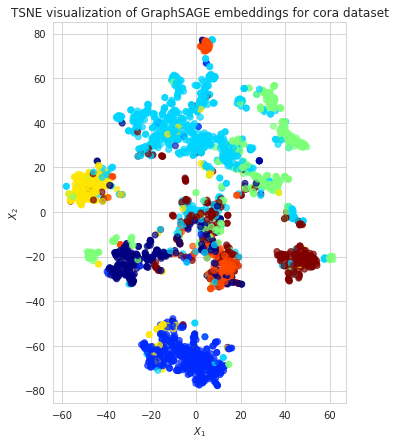

In [ ]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(
    emb_transformed[0],
    emb_transformed[1],
    c=emb_transformed["label"].astype("category"),
    cmap="jet",
    alpha=alpha,
)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of GraphSAGE embeddings for cora dataset".format(transform.__name__)
)
plt.show()

The observation that same-colored nodes in the embedding space are concentrated together is indicative  of similarity of embeddings of papers on the same topics. We would emphasize here again that the node embeddings are learnt in unsupervised way, without using true class labels. 

#### Downstream task

The node embeddings calculated using the unsupervised GraphSAGE can be used as node feature vectors in a downstream task such as node classification. 

In this example, we will use the  node embeddings to train a simple Logistic Regression classifier to predict paper subjects in Cora dataset.

In [ ]:
# X will hold the 50 input features (node embeddings)
X = node_embeddings
# y holds the corresponding target values
y = np.array(node_subject)

#### Data Splitting

We split the data into train and test sets. 

We use 5% of the data for training and the remaining 95% for testing as a hold out test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.05, test_size=None, stratify=y
)

#### Classifier Training

We train a Logistic Regression classifier on the training data. 

In [ ]:
clf = LogisticRegression(verbose=0, solver="lbfgs", multi_class="auto")
clf.fit(X_train, y_train)

LogisticRegression()

Predict the hold out test set:

In [ ]:
y_pred = clf.predict(X_test)

Calculate the accuracy of the classifier on the test set:

In [ ]:
accuracy_score(y_test, y_pred)

0.7594247959580257

The obtained accuracy is decent, better than that obtained by using node embeddings obtained by `node2vec`, which ignores node attributes, only taking into account graph structure (see this [demo](node2vec-embeddings.ipynb)). 

**Predicted classes**

In [ ]:
pd.Series(y_pred).value_counts()

2    778
6    436
1    428
3    345
0    280
4    211
5     95
dtype: int64

**True classes**

In [ ]:
pd.Series(y).value_counts()

2    818
3    426
1    418
6    351
0    298
4    217
5    180
dtype: int64

#### Uses for unsupervised graph representation learning
1. Unsupervised GraphSAGE learns embeddings of unlabeled graph nodes. This is highly useful as most real-world data is typically either unlabeled, or has noisy, unreliable, or sparse labels. In such scenarios unsupervised techniques that learn meaningful low-dimensional representation of nodes in a graph by leveraging the graph structure and node features is useful.
2. Moreover, GraphSAGE is an inductive technique that allows us to obtain embeddings of unseen nodes, without the need to re-train the embedding model. That is, instead of training individual embeddings for each node (as in algorithms such as `node2vec` that learn a look-up table of node embeddings), GraphSAGE learns a function that generates embeddings by sampling and aggregating attributes from each node's local neighborhood, and combines those with the node's own attributes.

### Node representation learning with Deep Graph Infomax


This demo demonstrates how to perform unsupervised training of several models using [the Deep Graph Infomax algorithm](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.DeepGraphInfomax) (https://arxiv.org/pdf/1809.10341.pdf) on the CORA dataset:

- [GCN](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.GCN) (both as a full-batch method, and with [the Cluster-GCN training procedure](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.mapper.ClusterNodeGenerator))
- [GAT](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.GAT) (only as a full-batch method, but the Cluster-GCN training procedure is also supported)
- [APPNP](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.APPNP) (as with GAT, only as a full-batch method, but the Cluster-GCN training procedure is also supported)
- [RGCN](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.RGCN)
- [GraphSAGE](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.GraphSAGE)
- [HinSAGE](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.HinSAGE)

As with all StellarGraph workflows: first we load the dataset, next we create our data generators, and then we train our model. We then take the embeddings created through unsupervised training and predict the node classes using logistic regression.

> See [the GCN + Deep Graph Infomax fine-tuning demo](../node-classification/gcn-deep-graph-infomax-fine-tuning-node-classification.ipynb) for semi-supervised training using Deep Graph Infomax, by fine-tuning the base model for node classification using labelled data.

In [ ]:
# install StellarGraph if running on Google Colab
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.2.1

In [ ]:
# verify that we're using the correct version of StellarGraph for this notebook
import stellargraph as sg

try:
    sg.utils.validate_notebook_version("1.2.1")
except AttributeError:
    raise ValueError(
        f"This notebook requires StellarGraph version 1.2.1, but a different version {sg.__version__} is installed.  Please see <https://github.com/stellargraph/stellargraph/issues/1172>."
    ) from None

In [ ]:
from stellargraph.mapper import (
    CorruptedGenerator,
    FullBatchNodeGenerator,
    GraphSAGENodeGenerator,
    HinSAGENodeGenerator,
    ClusterNodeGenerator,
)
from stellargraph import StellarGraph
from stellargraph.layer import GCN, DeepGraphInfomax, GraphSAGE, GAT, APPNP, HinSAGE

from stellargraph import datasets
from stellargraph.utils import plot_history

import pandas as pd
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from IPython.display import display, HTML

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import Model

(See [the "Loading from Pandas" demo](../basics/loading-pandas.ipynb) for details on how data can be loaded.)

In [ ]:
dataset = datasets.Cora()
display(HTML(dataset.description))
G, node_subjects = dataset.load()

#### Data Generators

Now we create the data generators using `CorruptedGenerator` ([docs](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.mapper.CorruptedGenerator)). `CorruptedGenerator` returns shuffled node features along with the regular node features and we train our model to discriminate between the two. 

Note that:

- We typically pass all nodes to `corrupted_generator.flow` because this is an unsupervised task
- We don't pass `targets` to `corrupted_generator.flow` because these are binary labels (true nodes, false nodes) that are created by `CorruptedGenerator`

In [ ]:
fullbatch_generator = FullBatchNodeGenerator(G, sparse=False)
gcn_model = GCN(layer_sizes=[128], activations=["relu"], generator=fullbatch_generator)

corrupted_generator = CorruptedGenerator(fullbatch_generator)
gen = corrupted_generator.flow(G.nodes())

Using GCN (local pooling) filters...


#### GCN Model Creation and Training

We create and train our `DeepGraphInfomax` model ([docs](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.DeepGraphInfomax)). Note that the loss used here must always be `tf.nn.sigmoid_cross_entropy_with_logits`.

In [ ]:
infomax = DeepGraphInfomax(gcn_model, corrupted_generator)
x_in, x_out = infomax.in_out_tensors()

model = Model(inputs=x_in, outputs=x_out)
model.compile(loss=tf.nn.sigmoid_cross_entropy_with_logits, optimizer=Adam(lr=1e-3))

In [ ]:
epochs = 100

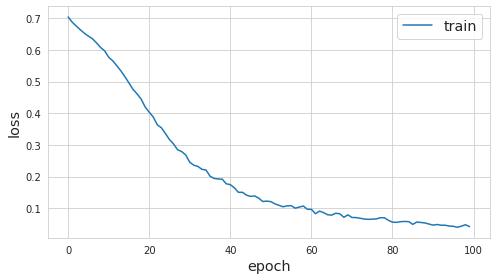

In [ ]:
es = EarlyStopping(monitor="loss", min_delta=0, patience=20)
history = model.fit(gen, epochs=epochs, verbose=0, callbacks=[es])
plot_history(history)

#### Extracting Embeddings and Logistic Regression

Since we've already trained the weights of our base model - GCN in this example - we can simply use `base_model.in_out_tensors` to obtain the trained node embedding model. Then we use logistic regression on the node embeddings to predict which class the node belongs to.

Note that the results here differ from the associated paper due to different train/test/val splits.

In [ ]:
x_emb_in, x_emb_out = gcn_model.in_out_tensors()

# for full batch models, squeeze out the batch dim (which is 1)
x_out = tf.squeeze(x_emb_out, axis=0)
emb_model = Model(inputs=x_emb_in, outputs=x_out)

In [ ]:
train_subjects, test_subjects = model_selection.train_test_split(
    node_subjects, train_size=0.1, test_size=None, stratify=node_subjects
)

test_gen = fullbatch_generator.flow(test_subjects.index)
train_gen = fullbatch_generator.flow(train_subjects.index)

test_embeddings = emb_model.predict(test_gen)
train_embeddings = emb_model.predict(train_gen)

lr = LogisticRegression(multi_class="auto", solver="lbfgs")
lr.fit(train_embeddings, train_subjects)

y_pred = lr.predict(test_embeddings)
gcn_acc = (y_pred == test_subjects).mean()
print(f"Test classification accuracy: {gcn_acc}")

Test classification accuracy: 0.765791632485644


This accuracy is close to that for [training a supervised GCN model end-to-end](../node-classification/gcn-node-classification.ipynb), suggesting that Deep Graph Infomax is an effective method for unsupervised training.

#### Visualisation with TSNE

Here we visualize the node embeddings with TSNE. As you can see below, the Deep Graph Infomax model produces well separated embeddings using unsupervised training.

In [ ]:
all_embeddings = emb_model.predict(fullbatch_generator.flow(G.nodes()))

y = node_subjects.astype("category")
trans = TSNE(n_components=2)
emb_transformed = pd.DataFrame(trans.fit_transform(all_embeddings), index=G.nodes())
emb_transformed["label"] = y

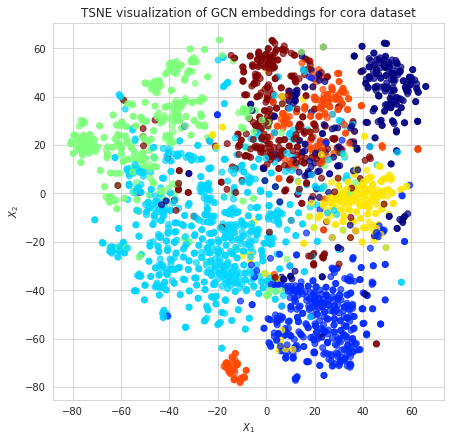

In [ ]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(
    emb_transformed[0],
    emb_transformed[1],
    c=emb_transformed["label"].cat.codes,
    cmap="jet",
    alpha=alpha,
)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title("TSNE visualization of GCN embeddings for cora dataset")
plt.show()

#### Comparing Different Models

Now we run Deep Graph Infomax training for other models. Note that switching between StellarGraph models only requires a few code changes.

In [ ]:
def run_deep_graph_infomax(
    base_model, generator, epochs, reorder=lambda sequence, subjects: subjects
):
    corrupted_generator = CorruptedGenerator(generator)
    gen = corrupted_generator.flow(G.nodes())
    infomax = DeepGraphInfomax(base_model, corrupted_generator)

    x_in, x_out = infomax.in_out_tensors()

    model = Model(inputs=x_in, outputs=x_out)
    model.compile(loss=tf.nn.sigmoid_cross_entropy_with_logits, optimizer=Adam(lr=1e-3))
    history = model.fit(gen, epochs=epochs, verbose=0, callbacks=[es])

    x_emb_in, x_emb_out = base_model.in_out_tensors()
    # for full batch models, squeeze out the batch dim (which is 1)
    if generator.num_batch_dims() == 2:
        x_emb_out = tf.squeeze(x_emb_out, axis=0)

    emb_model = Model(inputs=x_emb_in, outputs=x_emb_out)

    test_gen = generator.flow(test_subjects.index)
    train_gen = generator.flow(train_subjects.index)

    test_embeddings = emb_model.predict(test_gen)
    train_embeddings = emb_model.predict(train_gen)

    # some generators yield predictions in a different order to the .flow argument,
    # so we need to get everything lined up correctly
    ordered_test_subjects = reorder(test_gen, test_subjects)
    ordered_train_subjects = reorder(train_gen, train_subjects)

    lr = LogisticRegression(multi_class="auto", solver="lbfgs")
    lr.fit(train_embeddings, ordered_train_subjects)

    y_pred = lr.predict(test_embeddings)
    acc = (y_pred == ordered_test_subjects).mean()

    return acc

#### Cluster-GCN

[Cluster-GCN](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.mapper.ClusterNodeGenerator) is a scalable training procedure for that works for several "full batch" models in StellarGraph, including GCN (Graph Convolutional Networks), GAT (Graph Attention Networks) and APPNP (Approximate Personalized Propagation of Neural Predictions). This example just trains on GCN, but you can explore the others on your own. The training mechanism breaks the graph into a number of small subgraph "clusters" and trains a single GCN model on these, successively. It is equivalent to full-batch GCN with a single cluster (`clusters=1`), but with `clusters > 1` random clusters (as used here), its performance will be less than GCN. With better clusters, Cluster-GCN performance should be much improved.

(Note: `ClusterNodeGenerator` can be [used with Neo4j](https://stellargraph.readthedocs.io/en/stable/demos/connector/neo4j/cluster-gcn-on-cora-neo4j-example.html) for scalable training on large graphs, including unsupervised via Deep Graph Infomax.)

In [ ]:
cluster_generator = ClusterNodeGenerator(G, clusters=12, q=4)
cluster_gcn_model = GCN(
    layer_sizes=[128], activations=["relu"], generator=cluster_generator
)


def cluster_reorder(sequence, subjects):
    # shuffle the subjects into the same order as the sequence yield
    return subjects[sequence.node_order]


cluster_gcn_acc = run_deep_graph_infomax(
    cluster_gcn_model, cluster_generator, epochs=epochs, reorder=cluster_reorder
)
print(f"Test classification accuracy: {cluster_gcn_acc}")

Number of clusters 12
0 cluster has size 225
1 cluster has size 225
2 cluster has size 225
3 cluster has size 225
4 cluster has size 225
5 cluster has size 225
6 cluster has size 225
7 cluster has size 225
8 cluster has size 225
9 cluster has size 225
10 cluster has size 225
11 cluster has size 233
Test classification accuracy: 0.6542247744052502


#### GAT

[GAT](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.GAT) is a "full batch" model similar to GCN. It can also be trained using both `FullBatchNodeGenerator` and `ClusterNodeGenerator`, including for Deep Graph Infomax.

In [ ]:
gat_model = GAT(
    layer_sizes=[128], activations=["relu"], generator=fullbatch_generator, attn_heads=8,
)
gat_acc = run_deep_graph_infomax(gat_model, fullbatch_generator, epochs=epochs)

gat_acc
print(f"Test classification accuracy: {gat_acc}")

Test classification accuracy: 0.44011484823625924


#### APPNP

[APPNP](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.APPNP) is a "full batch" model similar to GCN. It can also be trained using both `FullBatchNodeGenerator` and `ClusterNodeGenerator`, including for Deep Graph Infomax.

In [ ]:
appnp_model = APPNP(
    layer_sizes=[128], activations=["relu"], generator=fullbatch_generator
)
appnp_acc = run_deep_graph_infomax(appnp_model, fullbatch_generator, epochs=epochs)

print(f"Test classification accuracy: {appnp_acc}")

Test classification accuracy: 0.49876948318293685


#### GraphSAGE

[GraphSAGE](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.GraphSAGE) is a sampling model, different to the models above.

In [ ]:
graphsage_generator = GraphSAGENodeGenerator(G, batch_size=1000, num_samples=[5])

graphsage_model = GraphSAGE(
    layer_sizes=[128], activations=["relu"], generator=graphsage_generator
)
graphsage_acc = run_deep_graph_infomax(
    graphsage_model, graphsage_generator, epochs=epochs
)

print(f"Test classification accuracy: {graphsage_acc}")

Test classification accuracy: 0.7235438884331419


#### Heterogeneous models

Cora is a homogeneous graph, with only one type of node (`paper`) and one type of edge (`type`). Models designed for heterogeneous graphs (with more than one of either) can also be applied to homogeneous graphs, but it is not using their additional flexibility.

##### HinSAGE

[HinSAGE](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.HinSAGE) is a generalisation of GraphSAGE to heterogeneous graphs that can be trained with Deep Graph Infomax. For homogeneous graphs, it is equivalent to GraphSAGE and it indeed gives similar results.

In [ ]:
hinsage_generator = HinSAGENodeGenerator(
    G, batch_size=1000, num_samples=[5], head_node_type="paper"
)

hinsage_model = HinSAGE(
    layer_sizes=[128], activations=["relu"], generator=hinsage_generator
)
hinsage_acc = run_deep_graph_infomax(hinsage_model, hinsage_generator, epochs=epochs)

print(f"Test classification accuracy: {hinsage_acc}")

Test classification accuracy: 0.7337981952420016


#### RGCN

[RGCN](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.RGCN) is a generalisation of GCN to heterogeneous graphs (with multiple edge types) that can be trained with Deep Graph Infomax. For homogeneous graphs, it is similar to GCN. It normalises the graph's adjacency matrix in a different manner and so won't exactly match it.

In [ ]:
from stellargraph.mapper import RelationalFullBatchNodeGenerator
from stellargraph.layer import RGCN

rgcn_generator = RelationalFullBatchNodeGenerator(G)

rgcn_model = RGCN(layer_sizes=[128], activations=["relu"], generator=rgcn_generator)

rgcn_acc = run_deep_graph_infomax(rgcn_model, rgcn_generator, epochs=epochs)
print(f"Test classification accuracy: {rgcn_acc}")

Test classification accuracy: 0.748974569319114


#### Overall results

The cell below shows the accuracy of each model.

In [ ]:
pd.DataFrame(
    [gat_acc, gcn_acc, cluster_gcn_acc, appnp_acc, graphsage_acc, hinsage_acc, rgcn_acc],
    index=["GAT", "GCN", "Cluster-GCN", "APPNP", "GraphSAGE", "HinSAGE", "RGCN"],
    columns=["Accuracy"],
)

,Accuracy
GAT,0.440115
GCN,0.765792
Cluster-GCN,0.654225
APPNP,0.498769
GraphSAGE,0.723544
HinSAGE,0.733798
RGCN,0.748975


#### Conclusion

This section demonstrated how to use [the Deep Graph Infomax algorithm](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.DeepGraphInfomax) to train other algorithms to yield useful embedding vectors for nodes, without supervision. To validate the quality of these vectors, it used logistic regression to perform a supervised node classification task.

See [the GCN + Deep Graph Infomax fine-tuning demo](../node-classification/gcn-deep-graph-infomax-fine-tuning-node-classification.ipynb) for semi-supervised training using Deep Graph Infomax, by fine-tuning the base model for node classification using labelled data.

# Hyperbolic Embeddings

Very often, relationships between entities are not well captured in standard, flat Euclidean spaces. Work on capturing latent hierarchial information often involves working in spaces (or manifolds) that allow for differing levels of distances based on their position in a heirarchy. 



In [ ]:
# empty cell

## Poincare Word Embeddings

In this last section, we will take a small break from pure graph and network data and look at different kinds of relations - words as networks, where we use [wordnet](https://wordnet.princeton.edu/) (we recommend checking this page out!) or similar relational databases of words to capture these relationships. Note, however, the social graphs are also highly clustered and so these approaches work for a wide range of such networks.

The method is described in detail in Maximilian Nickel, Douwe Kiela - “[Poincaré Embeddings for Learning Hierarchical Representations](https://arxiv.org/pdf/1705.08039.pdf)”.

The main use-case is to automatically learn hierarchical representations of nodes from a tree-like structure, such as a Directed Acyclic Graph (DAG), using a transitive closure of the relations. Representations of nodes in a symmetric graph can also be learned.

We will be using gensim to create the embeddings, and use the [documentation](https://radimrehurek.com/gensim/models/poincare.html) to help guide us. This [tutorial](https://github.com/harmanpreet93/poincare-embedding-using-gensim/blob/master/poincare-embeddings-using-gensim.ipynb) also offers us some useful functions.

In [ ]:
from gensim.models.poincare import PoincareModel

In [ ]:
# sample relational data
relations = [('kangaroo', 'marsupial'), ('kangaroo', 'mammal'), ('gib', 'cat')]

In [ ]:
model = PoincareModel(relations, negative=2)

In [ ]:
model.train(epochs=50)

In [ ]:
wv = model.kv.get_vector('kangaroo')

In [ ]:
wv

array([ 0.04640015, -0.02460394,  0.05563739,  0.01496385,  0.03725112,
        0.00615374, -0.03434598,  0.03051206,  0.0418259 ,  0.00454462,
       -0.02228578,  0.02157416, -0.01265357,  0.01386236, -0.04882618,
       -0.08402919,  0.0161399 ,  0.04209818,  0.01734006,  0.03749046,
        0.04897332,  0.0405684 ,  0.04965323,  0.05104704, -0.03754755,
        0.00271243, -0.04528086,  0.01332015, -0.03865304,  0.00374651,
        0.01622898,  0.02893338, -0.02629932,  0.05184463, -0.05889312,
        0.00388638,  0.01652343,  0.00160825,  0.04031764,  0.03290425,
       -0.02065457,  0.03767907,  0.03314999, -0.04244265, -0.01240247,
        0.02052427, -0.01616384,  0.00130704,  0.04640077, -0.00607241])

In [ ]:
model.kv.distance('mammal', 'marsupial')

0.013983641183799658

With such a small dataset, it is tough to get any meaningful relationships.

We will now use a larger relational file which is pre-loaded with gensim, and contains one relation per line.

In [ ]:
from gensim.models.poincare import PoincareRelations

In [ ]:
from gensim.test.utils import datapath

In [ ]:
relations = PoincareRelations(file_path=datapath('poincare_hypernyms_large.tsv'))
model = PoincareModel(train_data=relations)
model.train(epochs=50)

Let's look at these relations!

In [ ]:
for relation in relations:
  print(relation)

('kangaroo.n.01', 'marsupial.n.01')
('kangaroo.n.01', 'metatherian.n.01')
('kangaroo.n.01', 'mammal.n.01')
('gib.n.02', 'cat.n.01')
('striped_skunk.n.01', 'mammal.n.01')
('domestic_goat.n.01', 'even-toed_ungulate.n.01')
('rock_squirrel.n.01', 'ground_squirrel.n.02')
('vizsla.n.01', 'dog.n.01')
('dandie_dinmont.n.01', 'mammal.n.01')
('broodmare.n.01', 'horse.n.01')
('spotted_skunk.n.01', 'spotted_skunk.n.01')
('hispid_pocket_mouse.n.01', 'hispid_pocket_mouse.n.01')
('lesser_kudu.n.01', 'placental.n.01')
('water_shrew.n.01', 'insectivore.n.01')
('silky_anteater.n.01', 'placental.n.01')
('giant_kangaroo.n.01', 'metatherian.n.01')
('bronco.n.01', 'bronco.n.01')
('pekinese.n.01', 'pekinese.n.01')
('seattle_slew.n.01', 'thoroughbred.n.02')
('kinkajou.n.01', 'kinkajou.n.01')
('boxer.n.04', 'mammal.n.01')
('rabbit.n.01', 'placental.n.01')
('longhorn.n.01', 'bovid.n.01')
('blue_fox.n.01', 'fox.n.01')
('woolly_monkey.n.01', 'new_world_monkey.n.01')
('jungle_cat.n.01', 'jungle_cat.n.01')
('vole.n

In [ ]:
wv = model.kv.get_vector('kangaroo.n.01')

In [ ]:
wv

array([ 0.08848269, -0.00626555, -0.01501241, -0.02924922, -0.11259114,
        0.19180451, -0.03631974,  0.09506738,  0.03395604,  0.01425819,
        0.10300249, -0.04973628,  0.07015916,  0.17102938, -0.08365731,
       -0.31951016,  0.04548739,  0.07437066,  0.13810178,  0.25001197,
        0.1626546 ,  0.00792985,  0.08908213,  0.01353233, -0.09036873,
        0.08215076, -0.13413783,  0.02152943, -0.02785171, -0.14719753,
        0.01169892,  0.17637299, -0.21157818,  0.03861878, -0.15771474,
        0.16389603,  0.00734713, -0.00599655,  0.1919349 ,  0.07090435,
        0.05993279, -0.0356585 , -0.09663103, -0.0588996 ,  0.07985177,
       -0.03774824, -0.26093403, -0.2194412 ,  0.02344243,  0.09542624])

In [ ]:
model.kv.distance('mammal.n.01', 'carnivore.n.01')

2.9742298803339304

In [ ]:
model.kv.difference_in_hierarchy('mammal.n.01', 'dog.n.01')

0.05382517902410999

In [ ]:
model.kv.difference_in_hierarchy('dog.n.01', 'mammal.n.01')

-0.05382517902410999

In [ ]:
model.kv.most_similar('dog.n.01')

[('vizsla.n.01', 0.09686980767611089),
 ('insectivore.n.01', 2.520458065301932),
 ('wheel_horse.n.01', 2.5375837933236625),
 ('water_shrew.n.01', 2.5692181278747905),
 ('ungulate.n.01', 2.5733081853576047),
 ('placental.n.01', 2.5948792451103624),
 ('steenbok.n.01', 2.6181094838635826),
 ('leporid.n.01', 2.631444806447367),
 ('thoroughbred.n.02', 2.6347931554889272),
 ('viverrine.n.01', 2.647053828325847)]

In [ ]:
# Rank of distance of node 2 from node 1 in relation to distances of all nodes from node 1
model.kv.rank('dog.n.01', 'carnivore.n.01')

81

In [ ]:
model.kv.closest_child('dog.n.01')

'vizsla.n.01'

In [ ]:
model.kv.closest_child('mammal.n.01')

'mastiff_bat.n.01'

In [ ]:
model.kv.closest_parent('canine.n.02')

'wheel_horse.n.01'

In [ ]:
# Position in hierarchy - lower values represent that the node is higher in the hierarchy
print(model.kv.norm('dog.n.01'))
print(model.kv.norm('placental.n.01'))
print(model.kv.norm('mammal.n.01'))

0.6961260493783498
0.6229415566789187
0.6423008703542398


In [ ]:
# One possible descendant chain
model.kv.descendants('mammal.n.01')

['mastiff_bat.n.01',
 'vole.n.01',
 'soft-coated_wheaten_terrier.n.01',
 'striped_skunk.n.01',
 'dandie_dinmont.n.01']

In [ ]:
# One possible ancestor chain
model.kv.ancestors('dog.n.01')

['insectivore.n.01',
 'bovine.n.01',
 'leporid.n.01',
 'badger.n.02',
 'sporting_dog.n.01',
 'goat.n.01',
 'wheel_horse.n.01']

Some of these make a lot of sense! A few not so much - looking at the relations file in detail might give us some hints on how these embeddings are learned.

## Hyperbolic Graph and Image Embeddings

We can extend the idea of hyperbolic embeddings beyond words, to include images, as well as social networks. We do not go into details but leave useful links here for your pursuit:

- Hyberbolic Graph Convolutional Neural Networks: [blog post by Stanford team](https://dawn.cs.stanford.edu/2018/03/19/hyperbolics/) - [code](https://github.com/HazyResearch/hgcn). We note that this comes within relevant data that works as advertised, and can readily be extended to other relevant network data of your choice.

- Hyperbolic Image Embeddings - [paper](https://arxiv.org/abs/1904.02239) - [code](https://github.com/leymir/hyperbolic-image-embeddings).

# Homework

In this homework, you will be applying a series of machine learning and deep learning methods on graphs and networks. Because we ask so few questions, we require all answers for full credit.


**1)** Find and load a graph/network based dataset which is relevant to your field of social science.

In [65]:
import pandas as pd
import numpy as np
from collections import Counter
from tqdm import tqdm

In [103]:
chars = pd.read_csv('/content/drive/MyDrive/deep-learning/MovieSummaries/character.metadata.tsv', 
                    sep='\t',
                    names=['wiki_movie_id', 'fb_movie_id', 'release_date', 'char_name', 'actor_dob', 'actor_gender', 'actor_height', 'actor_ethnicity', 'actor_name', 'actor_age', 'fb_map_id', 'fb_char_id', 'fb_actor_id'])

movies = pd.read_csv('/content/drive/MyDrive/deep-learning/MovieSummaries/movie.metadata.tsv', 
                     sep='\t', 
                     names=['wiki_movie_id', 'fb_movie_id', 'title', 'release_date', 'revenue', 'runtime', 'langs', 'countries', 'genres'])

movies['is_english'] = movies.langs.apply(lambda x: 'English Language' in eval(x).values())
movies = movies[movies['is_english']]
movies['is_american'] = movies['countries'].apply(lambda x: '/m/09c7w0' in eval(x))
movies = movies[movies['is_american']]
movies['genre_list'] = movies['genres'].apply(lambda x: list(eval(x).values()))

genre_list = ['Drama', 'Comedy', 'Romance Film', 'Action', 'Thriller', 'Horror', 'Comedy film', 'Science Fiction']
for genre in genre_list: 
    movies[genre] = movies['genre_list'].apply(lambda x: genre in x).astype(int)

movies['Comedy'] = (movies['Comedy'] + movies.pop('Comedy film')).map({0: 0, 1: 1, 2: 1})
genre_list.remove('Comedy film')
movies = movies[movies[genre_list].sum(axis=1) == 1]

chars['release_date'] = pd.to_datetime(chars['release_date'], errors='coerce')
chars['release_year'] = pd.DatetimeIndex(chars['release_date']).year

chars = chars.merge(movies[['fb_movie_id', 'title', 'revenue'] + genre_list], how='inner', on='fb_movie_id')
chars = chars[(chars['release_year'] >= 2006) & (~chars['revenue'].isna())]

id_title = dict(zip(movies['fb_movie_id'], movies['title']))

print(chars.fb_movie_id.nunique(), 'movies')

419 movies


In [104]:
def make_adj_matrix(chars):
    movie_set = list(set(chars['fb_movie_id']))
    n_movies = len(movie_set)
    adj_mat = np.zeros((n_movies, n_movies))

    for i, movie1 in tqdm(list(enumerate(movie_set))): 
        movie1_df = chars[chars['fb_movie_id']==movie1]
        for j, movie2 in enumerate(movie_set):
            if i == j: 
                continue
            movie2_df = chars[chars['fb_movie_id']==movie2]
            adj_mat[i, j] = len(set(movie1_df['fb_actor_id']) & set(movie2_df['fb_actor_id']))

    return movie_set, adj_mat

In [105]:
movie_set, adj_mat = make_adj_matrix(chars)

100%|██████████| 419/419 [03:00<00:00,  2.32it/s]


In [186]:
id_title = dict(zip(movies['fb_movie_id'], movies['title']))
movie_g = nx.from_numpy_matrix(adj_mat)
movie_g = nx.relabel_nodes(movie_g, {i : id_title[w] for i, w in enumerate(movie_set)})

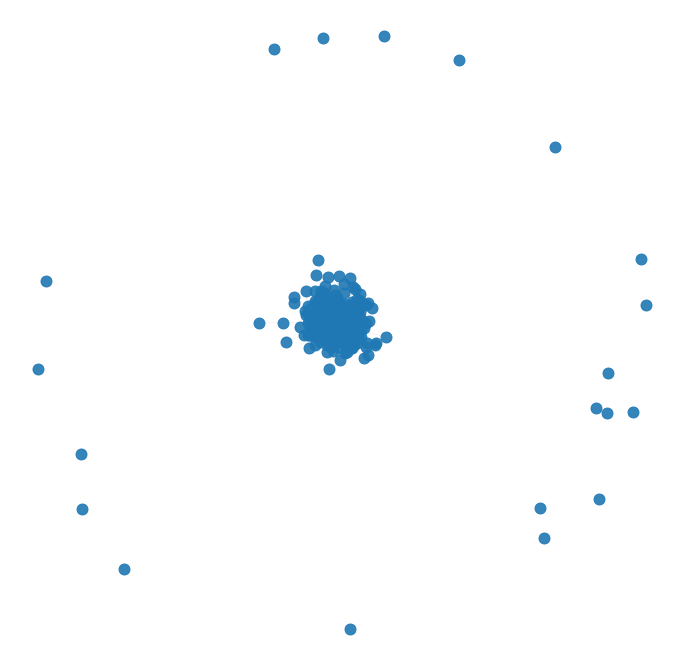

In [168]:
# Gcc = sorted(nx.connected_components(movie_g), key=len, reverse=True)
# movie_giant = movie_g.subgraph(Gcc[0])

# movie_g.remove_nodes_from(list(nx.isolates(movie_g)))

layout = nx.spring_layout(movie_g, weight='weight', iterations= 50, seed=2, k=10)
fig, ax = plt.subplots(figsize = (12,12))
nx.draw(movie_g, ax=ax,
        width=.1,
        # edgelist=final_edgelist,
        alpha=.9, 
        node_size=120,
        # node_color=colors,
        edge_color='grey',
        connectionstyle="arc3,rad=0.2", arrowstyle='-', font_size=12)

**2)** Create a shallow embedding of your nodes and edges, and apply some distance metrics on these to identify which nodes and edges are similar.

In [174]:
node2vec_movie = Node2Vec(movie_g, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs

Computing transition probabilities:   0%|          | 0/418 [00:00<?, ?it/s]

In [205]:
movie_model = node2vec_movie.fit(window=10, min_count=1, batch_words=4)

In [183]:
movies_small = movies[movies['fb_movie_id'].isin(movie_set)].sort_values('revenue', ascending=False)

In [220]:
movie_model.wv.get_vector("Shrek the Third")

American Gangster


array([-2.08932385e-01, -1.61666930e-01, -2.12890550e-01, -2.27252096e-01,
       -4.27048393e-02, -5.15155122e-02, -6.57900646e-02, -2.57813334e-01,
        4.50432524e-02,  1.63753018e-01, -1.64021194e-01,  3.38596046e-01,
        4.97135252e-01, -1.42740849e-02,  4.59862426e-02,  9.68891829e-02,
        1.96287587e-01,  7.25455862e-03, -5.79752386e-01,  7.10926056e-02,
       -1.02135189e-01,  3.67769361e-01,  6.61742017e-02, -1.16652185e-02,
        4.19718698e-02, -1.64188147e-01, -1.17072500e-01, -8.72289389e-02,
        2.00597048e-02,  3.72072339e-01, -1.69626370e-01, -4.79000628e-01,
        1.28262654e-01,  1.30806923e-01, -8.91288295e-02,  4.45132703e-02,
        2.15416178e-01, -1.12743497e-01, -4.96168584e-01, -2.08067775e-01,
       -1.93782657e-01, -4.68866110e-01,  1.18927874e-01,  2.90902942e-01,
        2.90583998e-01, -4.52043444e-01,  1.14594214e-01,  4.27167714e-02,
        3.86892594e-02,  3.22519422e-01,  1.75607726e-01,  1.14633881e-01,
        8.33725557e-02,  

In [221]:
np.random.seed(1)
random_titles = np.random.choice(movies_small['title'][:50], 10, replace=False)
similars = []
similarities = []
for title in random_titles:
    similars.append(movie_model.wv.most_similar(title)[0][0])
    similarities.append(movie_model.wv.most_similar(title)[0][1])
pd.DataFrame({'Movie': random_titles, 'Most similar': similars, 'Similarity': similarities})

,Movie,Most similar,Similarity
0,The Blind Side,The Golden Compass,0.631726
1,The Princess and the Frog,Lottery Ticket,0.616140
2,Gulliver's Travels,Nacho Libre,0.686018
3,The Bourne Legacy,Twelve and Holding,0.718870
4,Pirates of the Caribbean: On Stranger Tides,Hugo,0.615072
5,Ice Age: Continental Drift,Joyful Noise,0.704768
6,Open Season,Open Season 2,0.845648
7,Horton Hears a Who!,Chernobyl Diaries,0.677661
8,Paranormal Activity 3,Paranormal Activity,0.957409
9,The Expendables 2,Safe,0.791976


**3)** Perform a machine learning method on your graph for node classification, edge classification, link prediction, or community detection.

### Clustering

In [242]:
movie_g_unnamed = nx.relabel_nodes(movie_g, {id_title[w]: i for i, w in enumerate(movie_set)})

In [247]:
movie_g_unnamed = nx.from_numpy_matrix(adj_mat)
movie_model = LabelPropagation()
movie_model.fit(movie_g_unnamed)
movie_cluster_membership = movie_model.get_memberships()

In [258]:
target = np.argmax(movies_small[genre_list].to_numpy(), axis=1)

In [259]:
movie_cluster_membership = [movie_cluster_membership[node] for node in range(len(movie_cluster_membership))]

nmi = normalized_mutual_info_score(target, movie_cluster_membership)

In [260]:
print('NMI: {:.4f}'.format(nmi))

NMI: 0.0703


### Classification

In [268]:
node2vec_movie = Node2Vec(movie_g, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs
movie_model = node2vec_movie.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/418 [00:00<?, ?it/s]

In [363]:
from sklearn.model_selection import train_test_split

X = np.array([movie_model.wv.get_vector(title) for title in movies_small['title']])
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [324]:
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier

downstream_model = MLPClassifier(random_state=0).fit(X_train, y_train)
y_hat = downstream_model.predict_proba(X_test)
classes = downstream_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [325]:
classes_onehot = np.zeros((len(classes), 7))
for i, j in enumerate(classes):
    classes_onehot[i, j] = 1

In [326]:
auc = roc_auc_score(y_test, classes_onehot, multi_class='ovo')
print('AUC:', auc)

AUC: 0.5814989517819709


In [327]:
true_classes_onehot = np.zeros((len(y_test), 7))
for i, j in enumerate(y_test):
    true_classes_onehot[i, j] = 1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


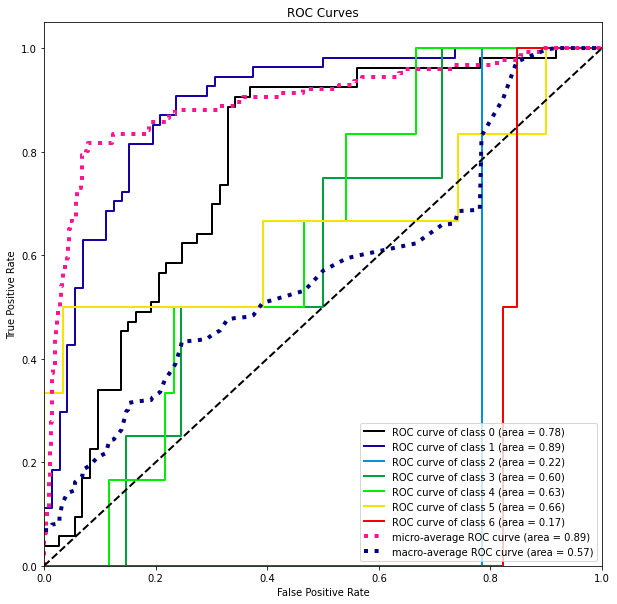

In [328]:
import scikitplot as skplt
skplt.metrics.plot_roc_curve(y_test, y_hat, figsize=(10, 10))

In [329]:
print(genre_list)

['Drama', 'Comedy', 'Romance Film', 'Action', 'Thriller', 'Horror', 'Science Fiction']


In [333]:
acc = (classes == y_test).sum() / len(y_test)
print("Accuracy:", acc)

Accuracy: 0.7142857142857143


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


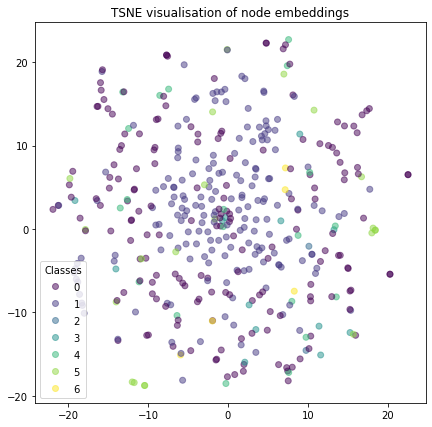

In [372]:
plot_tsne("TSNE visualisation of node embeddings", X, target)

In [370]:
for i, genre in enumerate(genre_list):
    print(i, genre)

0 Drama
1 Comedy
2 Romance Film
3 Action
4 Thriller
5 Horror
6 Science Fiction


**3b)** Reflect on what task the algorithm performed best, on what did it perform worst, and why?

In [435]:
rreflection = 'It performed better than I expected in the classification task with 71% accuracy on a 7 class classification problem. It performe the best on Drama and Comedy genres. The clsuteringn task, however, did not turn out to be very useful.' #@param {type:"string"}

**4)** Perform a deep learning method on your graph for node classification, edge classification, link prediction, or community detection.

In [405]:
import torch_geometric

In [564]:
movie_g_torch = torch_geometric.utils.from_networkx(movie_g)
movie_g_torch.y = torch.tensor(target).long()
movie_g_torch.x = torch.tensor(adj_mat).float()
movie_g_torch.train_mask = torch.tensor([np.random.random() > .5 for _ in range(419)])
print(movie_g_torch)

Data(edge_index=[2, 6007], weight=[6007], num_nodes=418, y=[419], x=[419, 419], train_mask=[419])


In [568]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(419, 50)
        self.conv2 = GCNConv(50, 20)
        self.conv3 = GCNConv(20, 10)

        self.conv4 = GCNConv(10, 10)
        self.classifier = Linear(10, 7)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()
        h = self.conv4(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

movie_model = GCN()
print(movie_model)

GCN(
  (conv1): GCNConv(419, 50)
  (conv2): GCNConv(50, 20)
  (conv3): GCNConv(20, 10)
  (conv4): GCNConv(10, 10)
  (classifier): Linear(in_features=10, out_features=7, bias=True)
)


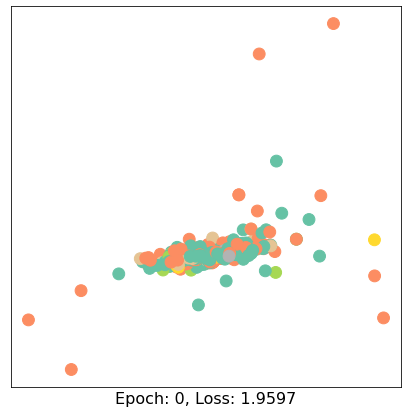

validation loss: 1.7603


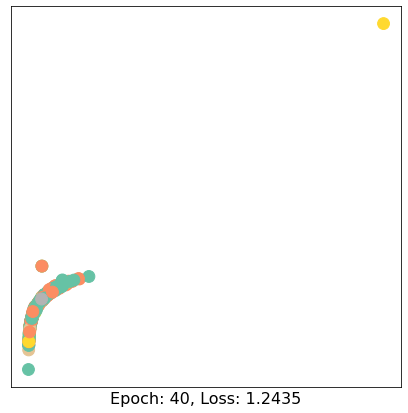

validation loss: 1.1688


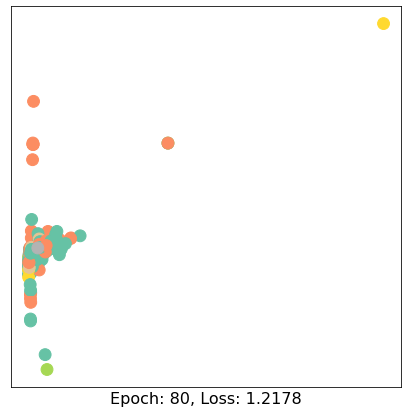

validation loss: 1.1722


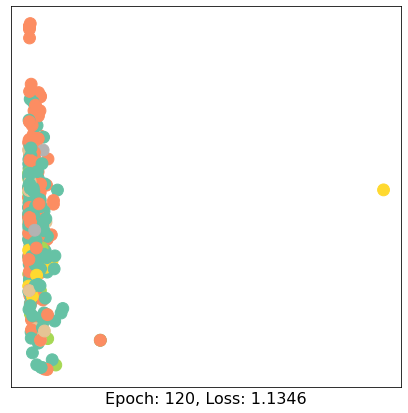

validation loss: 1.2048


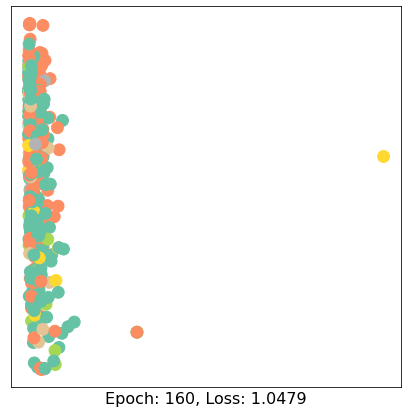

validation loss: 1.3524


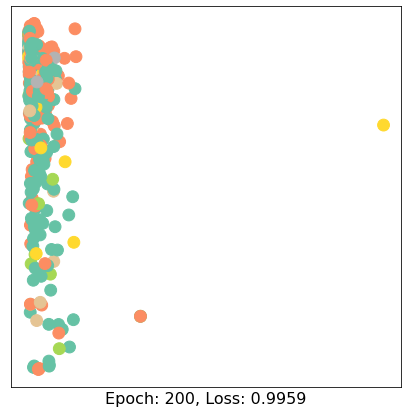

validation loss: 1.3721


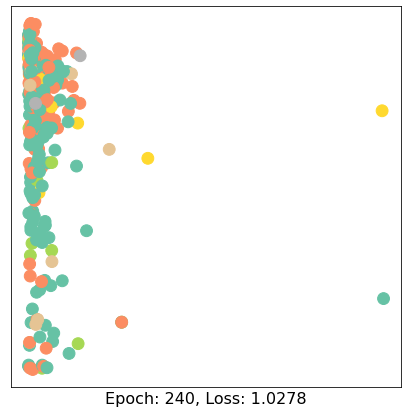

validation loss: 1.3693


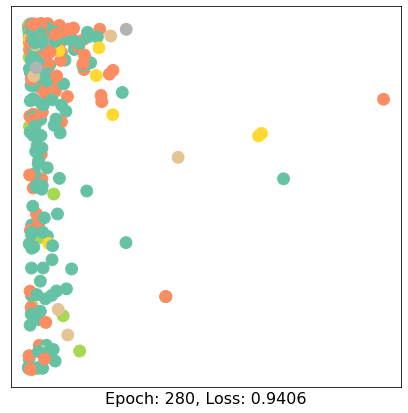

validation loss: 1.6839


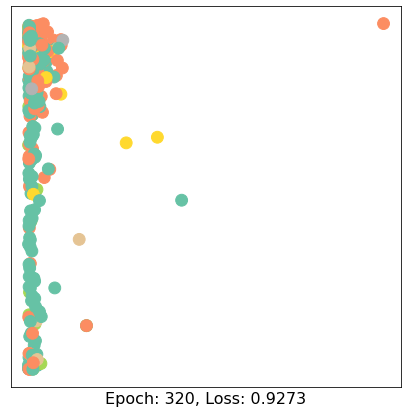

validation loss: 1.4789


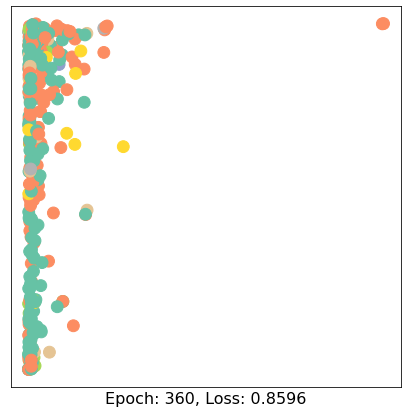

validation loss: 1.8036


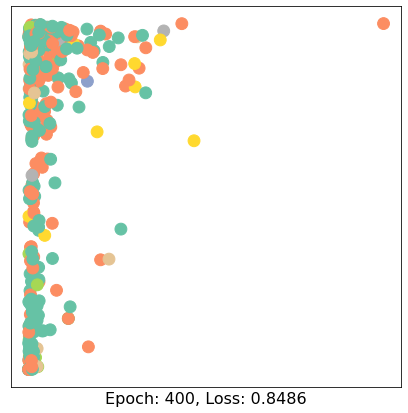

validation loss: 1.6439


In [569]:
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(movie_model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = movie_model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

for epoch in range(401):
    loss, h = train(movie_g_torch)
    if epoch % 40 == 0:
        visualize(h, color=movie_g_torch.y, epoch=epoch, loss=loss)
        with torch.no_grad():
            out, h = movie_model(movie_g_torch.x, movie_g_torch.edge_index)
            val_loss = criterion(out[~movie_g_torch.train_mask], movie_g_torch.y[~movie_g_torch.train_mask])
            print('validation loss:', round(float(val_loss), 4))

In [570]:
with torch.no_grad():
    out, h = movie_model(movie_g_torch.x, movie_g_torch.edge_index)

In [571]:
(out.argmax(axis=1)[~movie_g_torch.train_mask] == movie_g_torch.y[~movie_g_torch.train_mask]).sum() / len(movie_g_torch.y[~movie_g_torch.train_mask])

tensor(0.4058)

In [616]:
import torch.nn.functional as F

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(419, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, 7)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

movie_model = GCN(hidden_channels=16)
print(movie_model)

GCN(
  (conv1): GCNConv(419, 16)
  (conv2): GCNConv(16, 7)
)


In [617]:
optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

def train():
      movie_model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = movie_model(movie_g_torch.x, movie_g_torch.edge_index)  # Perform a single forward pass.
      loss = criterion(out[movie_g_torch.train_mask], movie_g_torch.y[movie_g_torch.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      movie_model.eval()
      out = movie_model(movie_g_torch.x, movie_g_torch.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[~movie_g_torch.train_mask] == movie_g_torch.y[~movie_g_torch.train_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int((~movie_g_torch.train_mask).sum())  # Derive ratio of correct predictions.
      return test_acc


for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

Epoch: 001, Loss: 1.9514
Epoch: 002, Loss: 1.9477
Epoch: 003, Loss: 1.9479
Epoch: 004, Loss: 1.9523
Epoch: 005, Loss: 1.9464
Epoch: 006, Loss: 1.9473
Epoch: 007, Loss: 1.9531
Epoch: 008, Loss: 1.9524
Epoch: 009, Loss: 1.9492
Epoch: 010, Loss: 1.9459
Epoch: 011, Loss: 1.9502
Epoch: 012, Loss: 1.9441
Epoch: 013, Loss: 1.9507
Epoch: 014, Loss: 1.9523
Epoch: 015, Loss: 1.9517
Epoch: 016, Loss: 1.9457
Epoch: 017, Loss: 1.9450
Epoch: 018, Loss: 1.9479
Epoch: 019, Loss: 1.9546
Epoch: 020, Loss: 1.9542
Epoch: 021, Loss: 1.9544
Epoch: 022, Loss: 1.9438
Epoch: 023, Loss: 1.9514
Epoch: 024, Loss: 1.9488
Epoch: 025, Loss: 1.9532
Epoch: 026, Loss: 1.9463
Epoch: 027, Loss: 1.9498
Epoch: 028, Loss: 1.9542
Epoch: 029, Loss: 1.9478
Epoch: 030, Loss: 1.9533
Epoch: 031, Loss: 1.9541
Epoch: 032, Loss: 1.9532
Epoch: 033, Loss: 1.9496
Epoch: 034, Loss: 1.9513
Epoch: 035, Loss: 1.9500
Epoch: 036, Loss: 1.9470
Epoch: 037, Loss: 1.9480
Epoch: 038, Loss: 1.9487
Epoch: 039, Loss: 1.9515
Epoch: 040, Loss: 1.9496


In [618]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.1014


In [619]:
import torch.nn.functional as F

class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(419, 128)
        self.conv2 = GCNConv(128, 64)
        self.conv3 = GCNConv(64, 64)
        self.conv4 = GCNConv(64, 32)
        self.conv5 = GCNConv(32, 16)
        self.classifier = Linear(16, 7)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)
        x = x.relu()
        x = self.conv4(x, edge_index)
        x = x.relu()
        x = self.conv5(x, edge_index)
        x = x.relu()
        x = self.classifier(x)
        x = x.softmax(dim=1)
        return x

movie_model = GCN()
print(movie_model)

GCN(
  (conv1): GCNConv(419, 128)
  (conv2): GCNConv(128, 64)
  (conv3): GCNConv(64, 64)
  (conv4): GCNConv(64, 32)
  (conv5): GCNConv(32, 16)
  (classifier): Linear(in_features=16, out_features=7, bias=True)
)


In [620]:
optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

Epoch: 001, Loss: 1.9373
Epoch: 002, Loss: 1.9373
Epoch: 003, Loss: 1.9373
Epoch: 004, Loss: 1.9373
Epoch: 005, Loss: 1.9373
Epoch: 006, Loss: 1.9373
Epoch: 007, Loss: 1.9373
Epoch: 008, Loss: 1.9373
Epoch: 009, Loss: 1.9373
Epoch: 010, Loss: 1.9373
Epoch: 011, Loss: 1.9373
Epoch: 012, Loss: 1.9373
Epoch: 013, Loss: 1.9373
Epoch: 014, Loss: 1.9373
Epoch: 015, Loss: 1.9373
Epoch: 016, Loss: 1.9373
Epoch: 017, Loss: 1.9373
Epoch: 018, Loss: 1.9373
Epoch: 019, Loss: 1.9373
Epoch: 020, Loss: 1.9373
Epoch: 021, Loss: 1.9373
Epoch: 022, Loss: 1.9373
Epoch: 023, Loss: 1.9373
Epoch: 024, Loss: 1.9373
Epoch: 025, Loss: 1.9373
Epoch: 026, Loss: 1.9373
Epoch: 027, Loss: 1.9373
Epoch: 028, Loss: 1.9373
Epoch: 029, Loss: 1.9373
Epoch: 030, Loss: 1.9373
Epoch: 031, Loss: 1.9373
Epoch: 032, Loss: 1.9373
Epoch: 033, Loss: 1.9373
Epoch: 034, Loss: 1.9373
Epoch: 035, Loss: 1.9373
Epoch: 036, Loss: 1.9373
Epoch: 037, Loss: 1.9373
Epoch: 038, Loss: 1.9373
Epoch: 039, Loss: 1.9373
Epoch: 040, Loss: 1.9373


In [621]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.0290


**4b)** Reflect on what task the algorithm performed best, on what did it perform worst, and why?

In [622]:
deep_reflection = 'Graph deep learning approaches did not perform as well as the sklearn multilayer perceptron in the genre classificaion task. I experimented with multiple architectures, and the most promising one was the one that used tanh activation function and 3 convolutional layers. One reason the models underperformed could be the insufficiency of training data.' #@param {type:"string"}

## Hint

Here is a hint notebook to ingest data for some of these models: [Likun Hint Notebook](https://colab.research.google.com/drive/1kgPM1KcOo0YVHQVSBSsWNwfXweUhs5q0?usp=sharing)